[색상표]

### 등급분류 (4) -> main color 그라데이션
- #1A2A80
- #3B38A0
- #7A85C1
- #B2B0E8

-----
### main color
- #262E5A

-----
### 센터별
- 중랑: #E6AF00 
- 탄천: #51BF7E 
- 서남: #DA5C5D 
- 난지: #5E62B2 
- extra #848C8C

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# 설정
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
# plt.rcParams['font.family'] ='Malgun Gothic' # 윈도우
plt.rcParams['font.family'] ='AppleGothic' # 맥
plt.rcParams['axes.unicode_minus'] = False

In [6]:
pd.read_csv("../data/add_feature/nanji_add_feature.csv", parse_dates=["날짜"]).columns

Index(['날짜', '요일', '공휴일', '목욕장업', '세탁업', '수영장업', '종합체육시설업', '체력단련장업', '하천',
       '생활인구', '불쾌지수(DI)', '불쾌지수등급', '일_일강수량(mm)', '일_최저기온(°C)', '일_평균기온(°C)',
       '일_최고기온(°C)', '일_평균풍속(m/s)', '일_최대순간풍속(m/s)', '최저습도(%)', '평균습도(%)',
       '최고습도(%)', '습도표준편차', '1처리장', '2처리장', '정화조', '중계펌프장', '합계', '계절', '월',
       '강수량_1일전', '강수량_2일전', '강수량_1일_누적', '강수량_2일_누적', '강수량_3일_누적',
       '강수량_5일_누적', '강수량_7일_누적', '일교차', '폭우_여부', '체감온도(°C)', '등급', '합계_1일후',
       '합계_2일후', '등급_1일후', '등급_2일후'],
      dtype='object')

[nanji] shape=(3069, 44), columns=44


,날짜,요일,공휴일,목욕장업,세탁업,수영장업,종합체육시설업,체력단련장업,하천,생활인구,...,강수량_5일_누적,강수량_7일_누적,일교차,폭우_여부,체감온도(°C),등급,합계_1일후,합계_2일후,등급_1일후,등급_2일후
0,2017-01-03,1,0,210,939,28,26,779,0.0,2021411.02,...,0.0,0.0,8.42,0,1.24074,0,510180.0,496289.0,0,0
1,2017-01-04,2,0,210,939,28,26,779,0.0,2016146.44,...,0.0,0.0,7.39,0,1.03715,0,496289.0,492958.0,0,0


[jungnang] shape=(3069, 44), columns=44


,날짜,요일,공휴일,목욕장업,세탁업,수영장업,종합체육시설업,체력단련장업,하천,생활인구,...,강수량_5일_누적,강수량_7일_누적,일교차,폭우_여부,체감온도(°C),등급,합계_1일후,합계_2일후,등급_1일후,등급_2일후
0,2017-01-03,1,0,353,2113,46,35,1355,0.0,3631853.44,...,1.5,1.5,8.46,0,1.596694,1,1225081.0,1215632.0,1,1
1,2017-01-04,2,0,353,2113,46,35,1355,0.0,3639234.09,...,1.5,1.5,8.08,0,1.439929,1,1215632.0,1249242.0,1,1


[seonam] shape=(3069, 43), columns=43


,날짜,요일,공휴일,목욕장업,세탁업,수영장업,종합체육시설업,체력단련장업,하천,생활인구,...,강수량_5일_누적,강수량_7일_누적,일교차,폭우_여부,체감온도(°C),등급,합계_1일후,합계_2일후,등급_1일후,등급_2일후
0,2017-01-03,1,0,454,2253,64,48,2212,0.0,4163121.84,...,0.2,0.2,8.17,0,-0.204226,1,1460573.0,1455815.0,1,1
1,2017-01-04,2,0,454,2253,64,48,2212,0.0,4147625.47,...,0.2,0.2,7.64,0,1.672846,1,1455815.0,1452640.0,1,1


[tancheon] shape=(3069, 42), columns=42


,날짜,요일,공휴일,목욕장업,세탁업,수영장업,종합체육시설업,체력단련장업,하천,생활인구,...,강수량_5일_누적,강수량_7일_누적,일교차,폭우_여부,체감온도(°C),등급,합계_1일후,합계_2일후,등급_1일후,등급_2일후
0,2017-01-03,1,0,189,1017,39,41,1143,0.0,2008282.48,...,0.0,0.0,8.02,0,0.232826,1,671066.0,656065.0,1,0
1,2017-01-04,2,0,189,1017,39,41,1143,0.0,1999705.18,...,0.0,0.0,7.68,0,1.957355,1,656065.0,660300.0,0,0


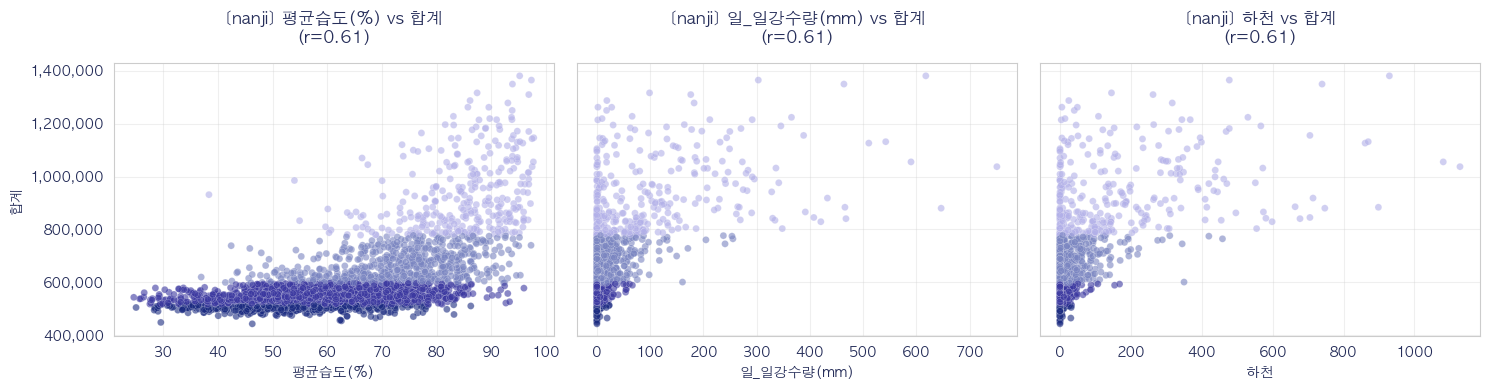

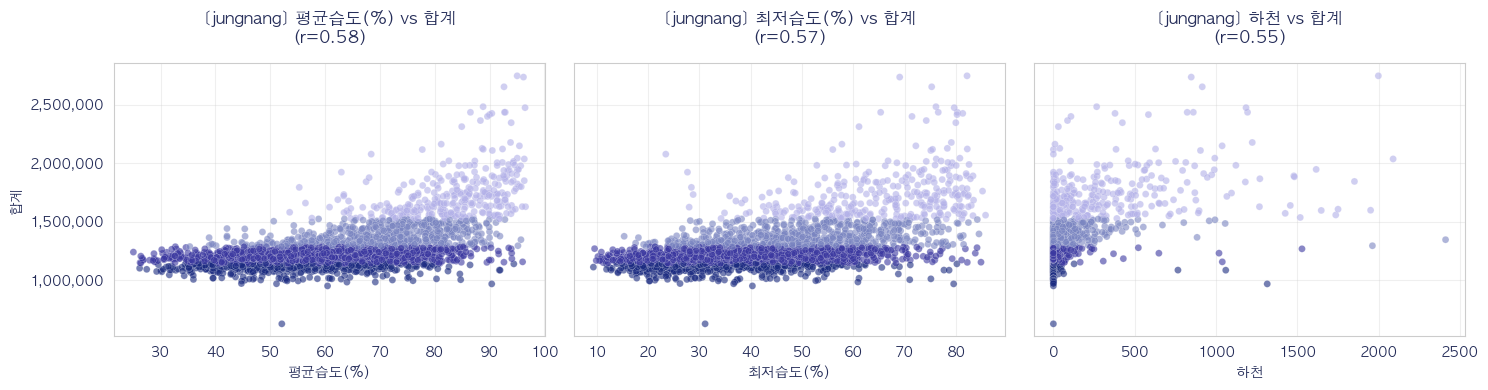

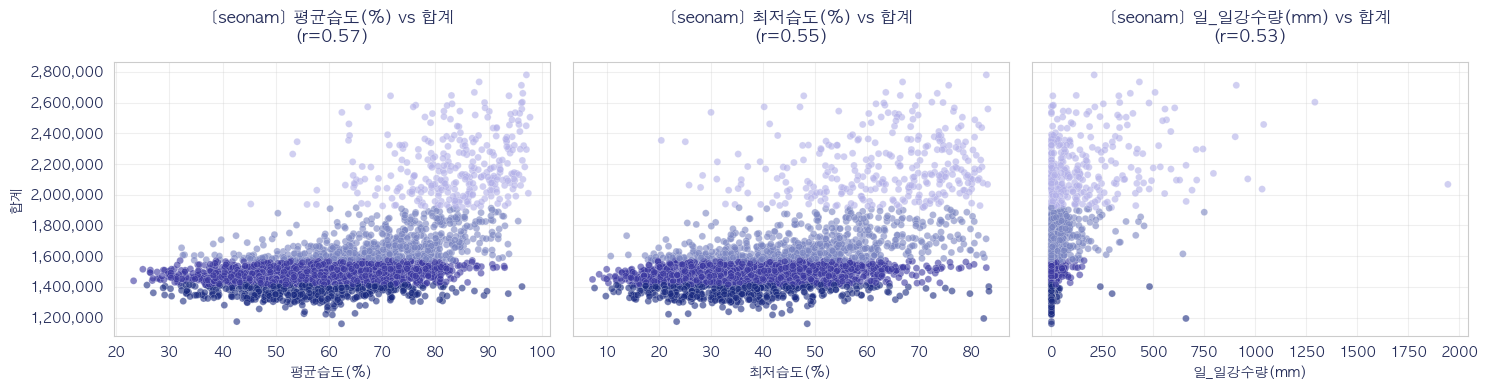

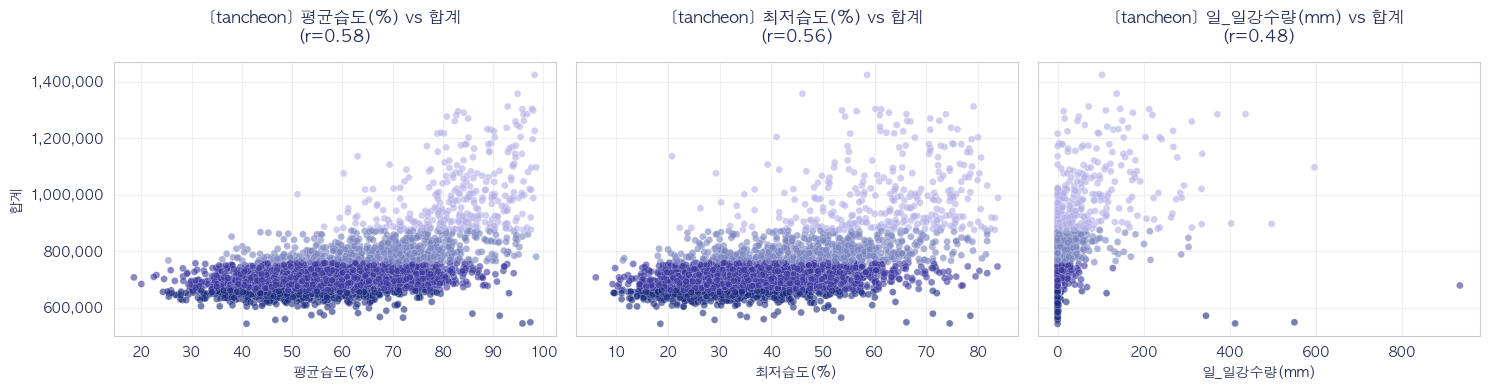

'\nfor name, df in dfs.items():\n    feature_cols = get_feature_cols(df, not_use_col)\n    feature_cols = [c for c in feature_cols if c not in ["합계"]]\n\n    corr = (\n        df[feature_cols + ["합계"]]\n        .corr(numeric_only=True)["합계"]\n        .drop(labels=["합계"])\n        .sort_values(ascending=False)\n    )\n    top_feats = corr.head(TOPK).index.tolist()\n\n    fig, axes = plt.subplots(1, TOPK, figsize=(5*TOPK, 4), sharey=True)\n    if TOPK == 1: axes = [axes]\n\n    for ax, feat in zip(axes, top_feats):\n        sns.scatterplot(\n            data=df, x=feat, y="합계",\n            hue="등급", palette=CLASS_COLORS, alpha=0.6, s=25, ax=ax, edgecolor=\'white\', linewidth=0.2\n        )\n        \n        # Y축을 K, M 단위로 표시\n        ax.yaxis.set_major_formatter(FuncFormatter(format_with_units))\n        \n        ax.set_title(f"[{name}] {feat} vs 합계 (단위표시)\n(r={corr[feat]:.2f})", \n                    fontsize=12, fontweight=\'bold\', color=MAIN_COLOR, pad=15)\n        ax.set_xlabel(f

In [7]:
# 상관관계 산점도 (Y축 과학적 표기법 제거)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# ================================
# 색상표 정의
# ================================
CLASS_COLORS = ["#1A2A80", "#3B38A0", "#7A85C1", "#B2B0E8"]
MAIN_COLOR = "#262E5A"

# 과학적 표기법 제거를 위한 포맷터 정의
def format_plain(x, pos):
    """일반 숫자 형식 포맷터 (콤마 포함)"""
    return f'{x:,.0f}'

def format_with_units(x, pos):
    """K, M 단위로 표시"""
    if x >= 1000000:
        return f'{x/1000000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.0f}K'
    else:
        return f'{x:.0f}'

# --- 파일 경로 딕셔너리 ---
paths = {
    "nanji":     "../data/add_feature/nanji_add_feature.csv",
    "jungnang":  "../data/add_feature/jungnang_add_feature.csv",
    "seonam":    "../data/add_feature/seonam_add_feature.csv",
    "tancheon":  "../data/add_feature/tancheon_add_feature.csv",
}

# --- X에서 제외할 컬럼(타깃/ID/설비 등) ---
not_use_col = [
    "날짜", "1처리장","2처리장","정화조","중계펌프장",
    "시설현대화","3처리장","4처리장",
    "합계","합계_1일후","합계_2일후",
    "등급","등급_1일후","등급_2일후",'강수량_1일전', '강수량_2일전', '강수량_1일_누적', '강수량_2일_누적', '강수량_3일_누적',
       '강수량_5일_누적', '강수량_7일_누적', '일교차', '폭우_여부', '체감온도(°C)', '등급', '합계_1일후',
       '합계_2일후', '등급_1일후', '등급_2일후'
]

# --- CSV 로드 (날짜 파싱) ---
dfs = {name: pd.read_csv(path, parse_dates=["날짜"]) for name, path in paths.items()}

# --- 공용 헬퍼: 피처 선택(수치형만) ---
def get_feature_cols(df, not_use):
    cols = [c for c in df.columns if c not in not_use]
    num_cols = df[cols].select_dtypes(include=["number"]).columns.tolist()
    # 상수열 제거(상관계수에서 NaN 방지)
    nunique = df[num_cols].nunique()
    num_cols = [c for c in num_cols if nunique[c] > 1]
    return num_cols

# --- 로드 확인 ---
for name, df in dfs.items():
    print(f"[{name}] shape={df.shape}, columns={len(df.columns)}")
    display(df.head(2))

TOPK = 3  # 타깃과 상관 높은 피처 상위 K개

for name, df in dfs.items():
    feature_cols = get_feature_cols(df, not_use_col)
    feature_cols = [c for c in feature_cols if c not in ["합계"]]

    corr = (
        df[feature_cols + ["합계"]]
        .corr(numeric_only=True)["합계"]
        .drop(labels=["합계"])
        .sort_values(ascending=False)
    )
    top_feats = corr.head(TOPK).index.tolist()

    fig, axes = plt.subplots(1, TOPK, figsize=(5*TOPK, 4), sharey=True)
    if TOPK == 1: axes = [axes]

    for ax, feat in zip(axes, top_feats):
        sns.scatterplot(
            data=df, x=feat, y="합계",
            hue="등급", palette=CLASS_COLORS, alpha=0.6, s=25, ax=ax, edgecolor='white', linewidth=0.2, legend=False
        )
        
        # Y축 과학적 표기법 제거
        ax.yaxis.set_major_formatter(FuncFormatter(format_plain))
        
        # 제목과 축 레이블 스타일 적용
        ax.set_title(f"[{name}] {feat} vs 합계\n(r={corr[feat]:.2f})", 
                    fontsize=12, fontweight='bold', color=MAIN_COLOR, pad=15)
        ax.set_xlabel(feat, fontweight='bold', color=MAIN_COLOR)
        ax.set_ylabel("합계", fontweight='bold', color=MAIN_COLOR)
        
        ax.grid(alpha=0.3)

        
        # 틱 색상 적용
        ax.tick_params(colors=MAIN_COLOR)
    
    plt.tight_layout()
    plt.show()

# ================================
# 추가: 단위 표시 버전 (선택사항)
# ================================

# 만약 K, M 단위로 표시하고 싶다면 다음 코드를 사용:
"""
for name, df in dfs.items():
    feature_cols = get_feature_cols(df, not_use_col)
    feature_cols = [c for c in feature_cols if c not in ["합계"]]

    corr = (
        df[feature_cols + ["합계"]]
        .corr(numeric_only=True)["합계"]
        .drop(labels=["합계"])
        .sort_values(ascending=False)
    )
    top_feats = corr.head(TOPK).index.tolist()

    fig, axes = plt.subplots(1, TOPK, figsize=(5*TOPK, 4), sharey=True)
    if TOPK == 1: axes = [axes]

    for ax, feat in zip(axes, top_feats):
        sns.scatterplot(
            data=df, x=feat, y="합계",
            hue="등급", palette=CLASS_COLORS, alpha=0.6, s=25, ax=ax, edgecolor='white', linewidth=0.2
        )
        
        # Y축을 K, M 단위로 표시
        ax.yaxis.set_major_formatter(FuncFormatter(format_with_units))
        
        ax.set_title(f"[{name}] {feat} vs 합계 (단위표시)\n(r={corr[feat]:.2f})", 
                    fontsize=12, fontweight='bold', color=MAIN_COLOR, pad=15)
        ax.set_xlabel(feat, fontweight='bold', color=MAIN_COLOR)
        ax.set_ylabel("합계", fontweight='bold', color=MAIN_COLOR)
        ax.grid(alpha=0.3)
        
        legend = ax.legend(title="등급", loc="best", framealpha=0.9)
        legend.get_title().set_fontweight('bold')
        legend.get_title().set_color(MAIN_COLOR)
        
        ax.tick_params(colors=MAIN_COLOR)
    
    plt.tight_layout()
    plt.show()
"""

좋은 코드 작성해주셨어요 👏
이 코드는 결국 \*\*“타깃 변수(`합계`)와 상관성이 높은 피처 TOP 3개를 자동으로 뽑아서, 산점도로 시각화”\*\*하는 파이프라인이에요.

---

## 코드 흐름 정리

1. **데이터 로드**

   * 각 처리장별 CSV를 `dfs` 딕셔너리에 로드.
   * 날짜(`날짜`)는 `datetime`으로 파싱.

2. **제외할 컬럼 설정**

   * `not_use_col`에는 타깃(`합계`), ID성, 미래 누출 변수(`합계_1일후`, `등급_1일후` 등), 기상 파생 변수 중 안 쓸 것들을 넣음.

3. **피처 선택 함수 (`get_feature_cols`)**

   * `not_use_col` 제외 → 수치형만 추출 → 상수열(값이 하나뿐인 컬럼) 제거.

4. **상관계수 기반 TOPK 피처 선택**

   * `df[feature_cols + ["합계"]].corr()` → `합계`와의 피어슨 상관계수 계산.
   * 상위 K개 피처 추출 (`TOPK = 3`).

5. **시각화**

   * 각 피처 vs `합계` 산점도.
   * 점 색깔(`hue`) = `등급` (CLASS\_COLORS 팔레트 적용).
   * 그래프 제목에 `상관계수 r` 표시.

---

## 그래프 해석 포인트

그래프는 **각 피처 값(x축)과 합계(y축) 관계**를 보여주고, 색깔은 `등급`을 구분해 줍니다.

1. **상관계수 r 해석**

   * `r ≈ 1` → 강한 양의 상관 (x 증가 → 합계 증가)
   * `r ≈ -1` → 강한 음의 상관 (x 증가 → 합계 감소)
   * `r ≈ 0` → 선형 관계 거의 없음

   제목에 `r=0.82` 이런 식으로 뜨니까, 어느 피처가 합계와 더 직결되는지 한눈에 알 수 있음.

2. **산점도 해석**

   * 점들이 대각선 방향으로 모여 있으면 → 상관 강함.
   * 구름처럼 흩어져 있으면 → 상관 약함.
   * `등급`별 색깔 분포를 보면 → 특정 등급이 어떤 영역에 주로 위치하는지도 파악 가능.
     (예: 고등급은 합계가 높고 특정 피처 값 범위에서 몰려 있음)

3. **모델링 관점**

   * 상관 높은 피처들은 예측에 중요한 변수 후보.
   * 다만 단순 상관만 본 것이므로 **다중공선성** 여부(피처끼리 상관)도 추가 체크 필요.
   * 산점도에서 비선형 패턴이 보이면 단순 선형 회귀보다는 **트리 기반 모델**이 더 적합할 수 있음.

---

✅ 요약하면:

* 이 코드는 **타깃과 잘 맞는 설명변수 TOP3를 자동으로 찾아서 관계를 시각화**하는 파이프라인.
* 그래프에서 `r`이 높을수록 해당 피처는 `합계` 예측에 더 유용.
* 색깔(`등급`)을 보면 **타깃의 클래스별 분포 특성**도 확인 가능.

---

원하시면 제가 예시 데이터 만들어서, 실제로 그래프 예시를 같이 그려서 "이런 식으로 해석한다"를 시각적으로 보여드릴까요?



[nanji] 합계
=== nanji 합계 분포 분석 ===
데이터 개수: 3103
결측치: 0개

기본 통계량:
  평균: 598017.9
  표준편차: 144947.6
  중앙값: 555680.0
  최솟값: 0.0
  최댓값: 1381444.0
  범위: 1381444.0

분위수:
   5%: 496842.1
  10%: 506758.8
  25%: 526414.0
  50%: 555680.0
  75%: 615510.0
  90%: 776100.8
  95%: 885596.1
  99%: 1144541.0

정규성 검정 (Shapiro-Wilk):
  통계량: 0.7427
  p-값: 1.35e-56
  정규분포 여부: 아니오

분포 형태:
  왜도 (Skewness): 1.276 (오른쪽 치우침)
  첨도 (Kurtosis): 6.844 (뾰족함)

이상치 분석 (IQR 방법):
  IQR: 89096.0
  하한: 392770.0
  상한: 749154.0
  이상치 개수: 393개 (12.7%)
  이상치 범위: 0.0 ~ 1381444.0


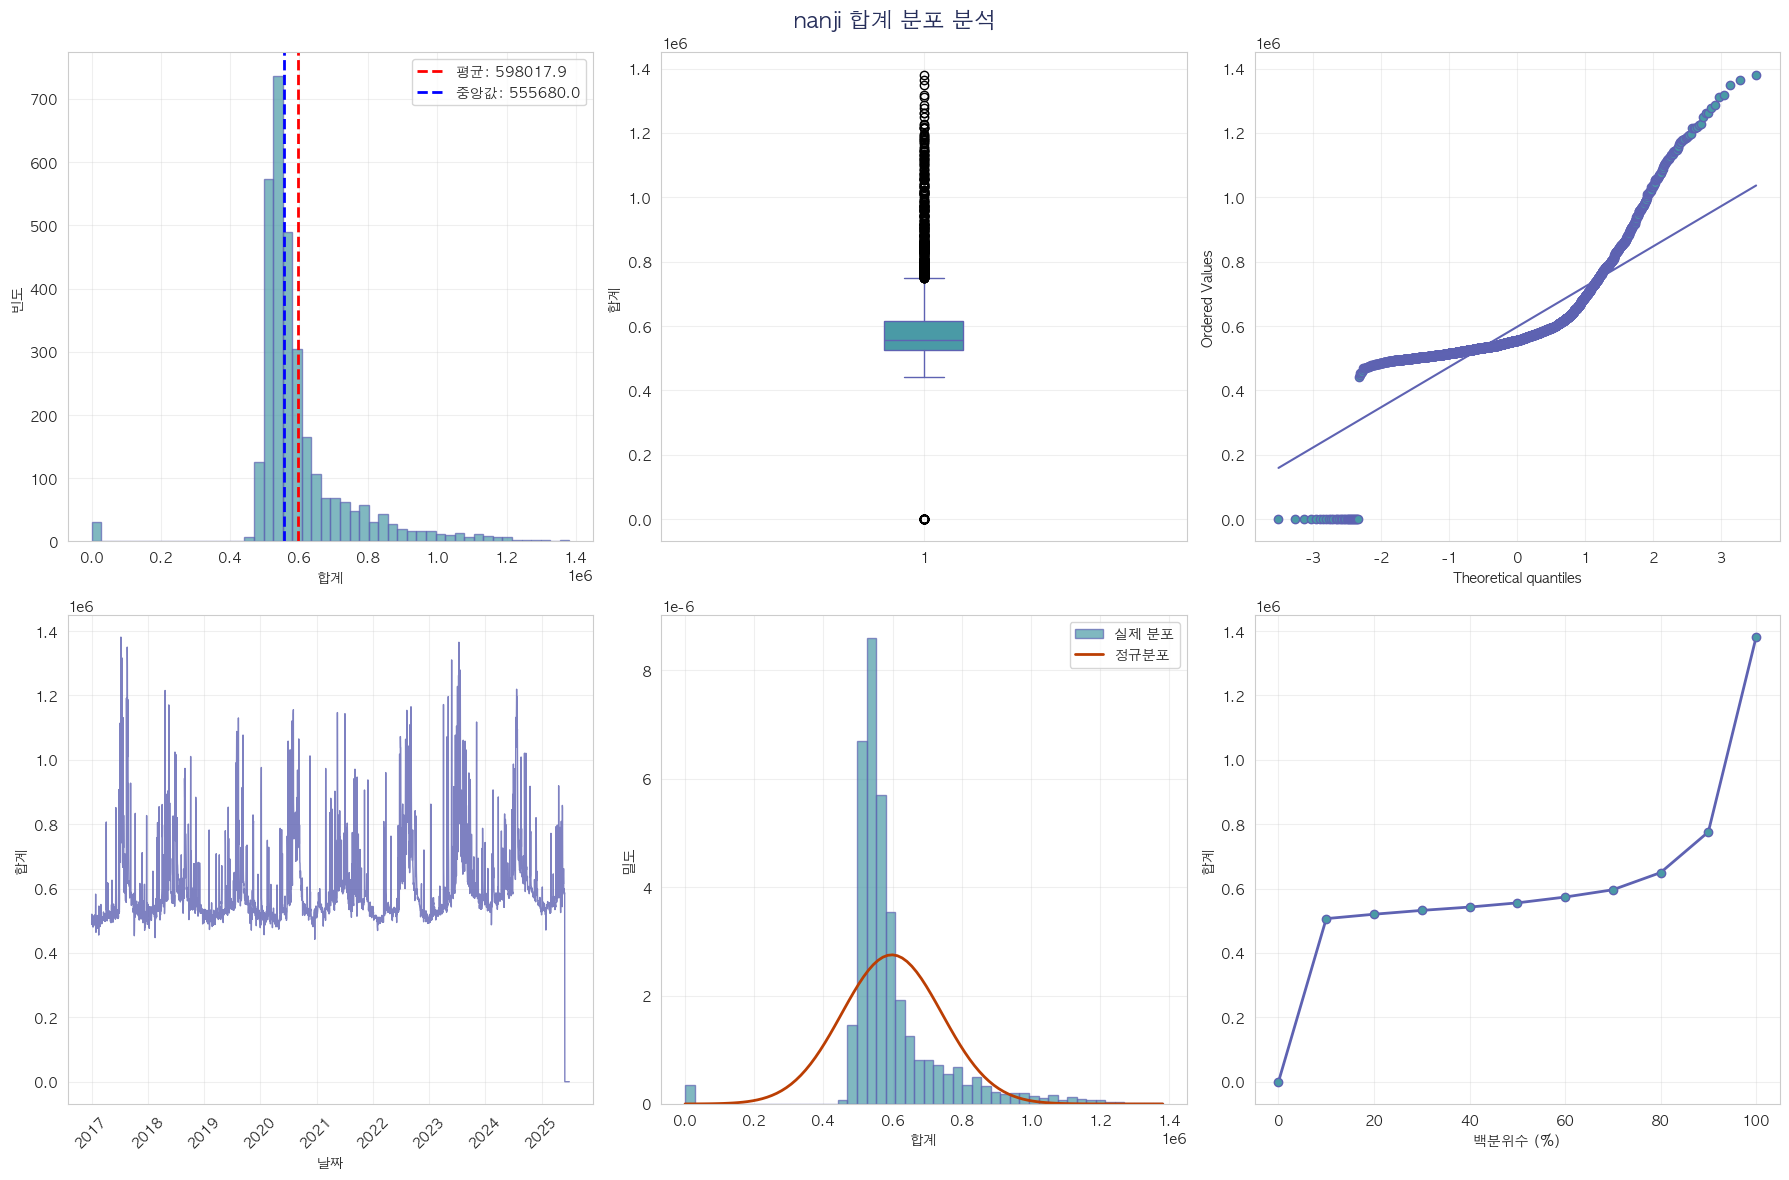


[jungnang] 합계
=== jungnang 합계 분포 분석 ===
데이터 개수: 3103
결측치: 0개

기본 통계량:
  평균: 1278201.9
  표준편차: 197021.2
  중앙값: 1221904.0
  최솟값: 101840.0
  최댓값: 2745792.0
  범위: 2643952.0

분위수:
   5%: 1093162.7
  10%: 1123087.6
  25%: 1169072.5
  50%: 1221904.0
  75%: 1314935.5
  90%: 1522312.6
  95%: 1688105.3
  99%: 1991156.8

정규성 검정 (Shapiro-Wilk):
  통계량: 0.7776
  p-값: 5.01e-54
  정규분포 여부: 아니오

분포 형태:
  왜도 (Skewness): 2.310 (오른쪽 치우침)
  첨도 (Kurtosis): 8.719 (뾰족함)

이상치 분석 (IQR 방법):
  IQR: 145863.0
  하한: 950278.0
  상한: 1533730.0
  이상치 개수: 298개 (9.6%)
  이상치 범위: 101840.0 ~ 2745792.0


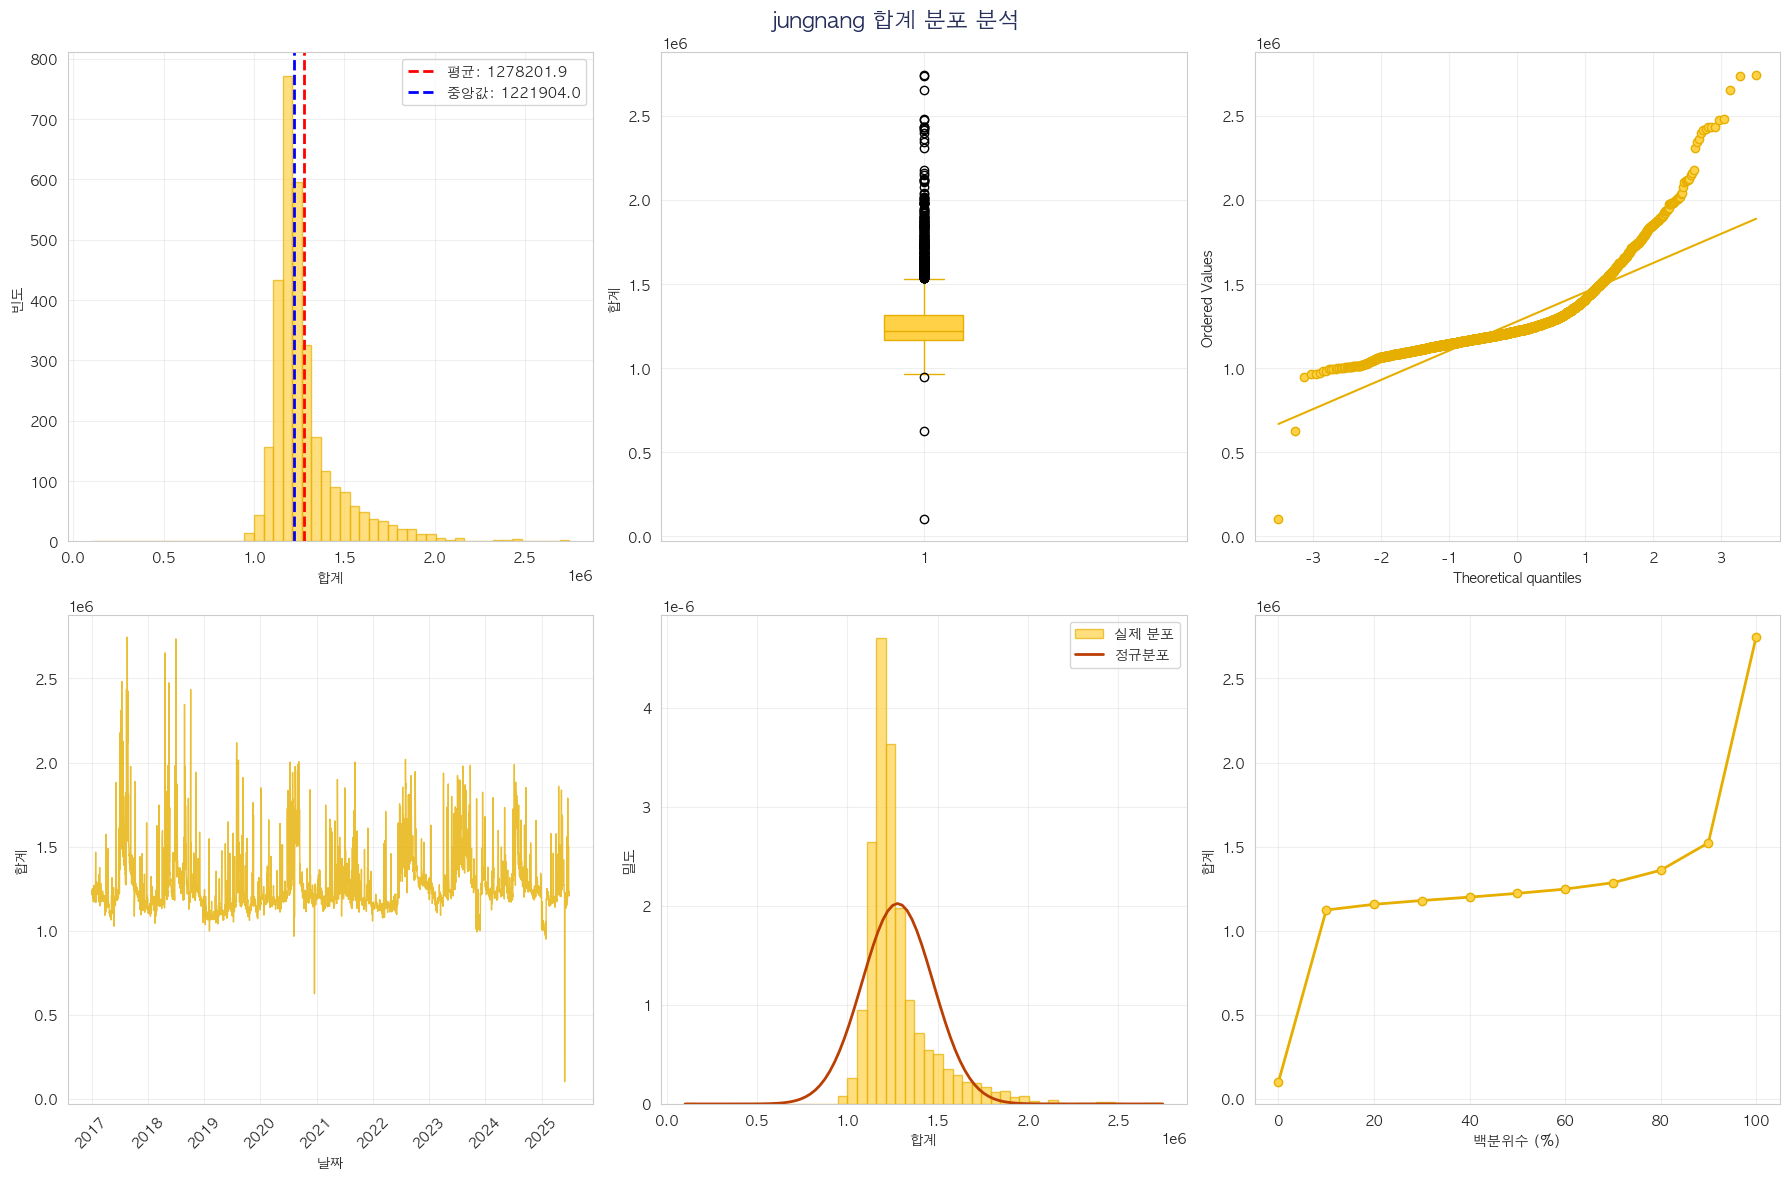


[seonam] 합계
=== seonam 합계 분포 분석 ===
데이터 개수: 3103
결측치: 0개

기본 통계량:
  평균: 1561300.8
  표준편차: 283081.9
  중앙값: 1502932.0
  최솟값: 0.0
  최댓값: 2780034.0
  범위: 2780034.0

분위수:
   5%: 1341054.5
  10%: 1386484.8
  25%: 1444337.0
  50%: 1502932.0
  75%: 1601619.5
  90%: 1909166.4
  95%: 2127173.6
  99%: 2491658.5

정규성 검정 (Shapiro-Wilk):
  통계량: 0.7333
  p-값: 3.09e-57
  정규분포 여부: 아니오

분포 형태:
  왜도 (Skewness): -0.257 (대칭적)
  첨도 (Kurtosis): 10.049 (뾰족함)

이상치 분석 (IQR 방법):
  IQR: 157282.5
  하한: 1208413.2
  상한: 1837543.2
  이상치 개수: 394개 (12.7%)
  이상치 범위: 0.0 ~ 2780034.0


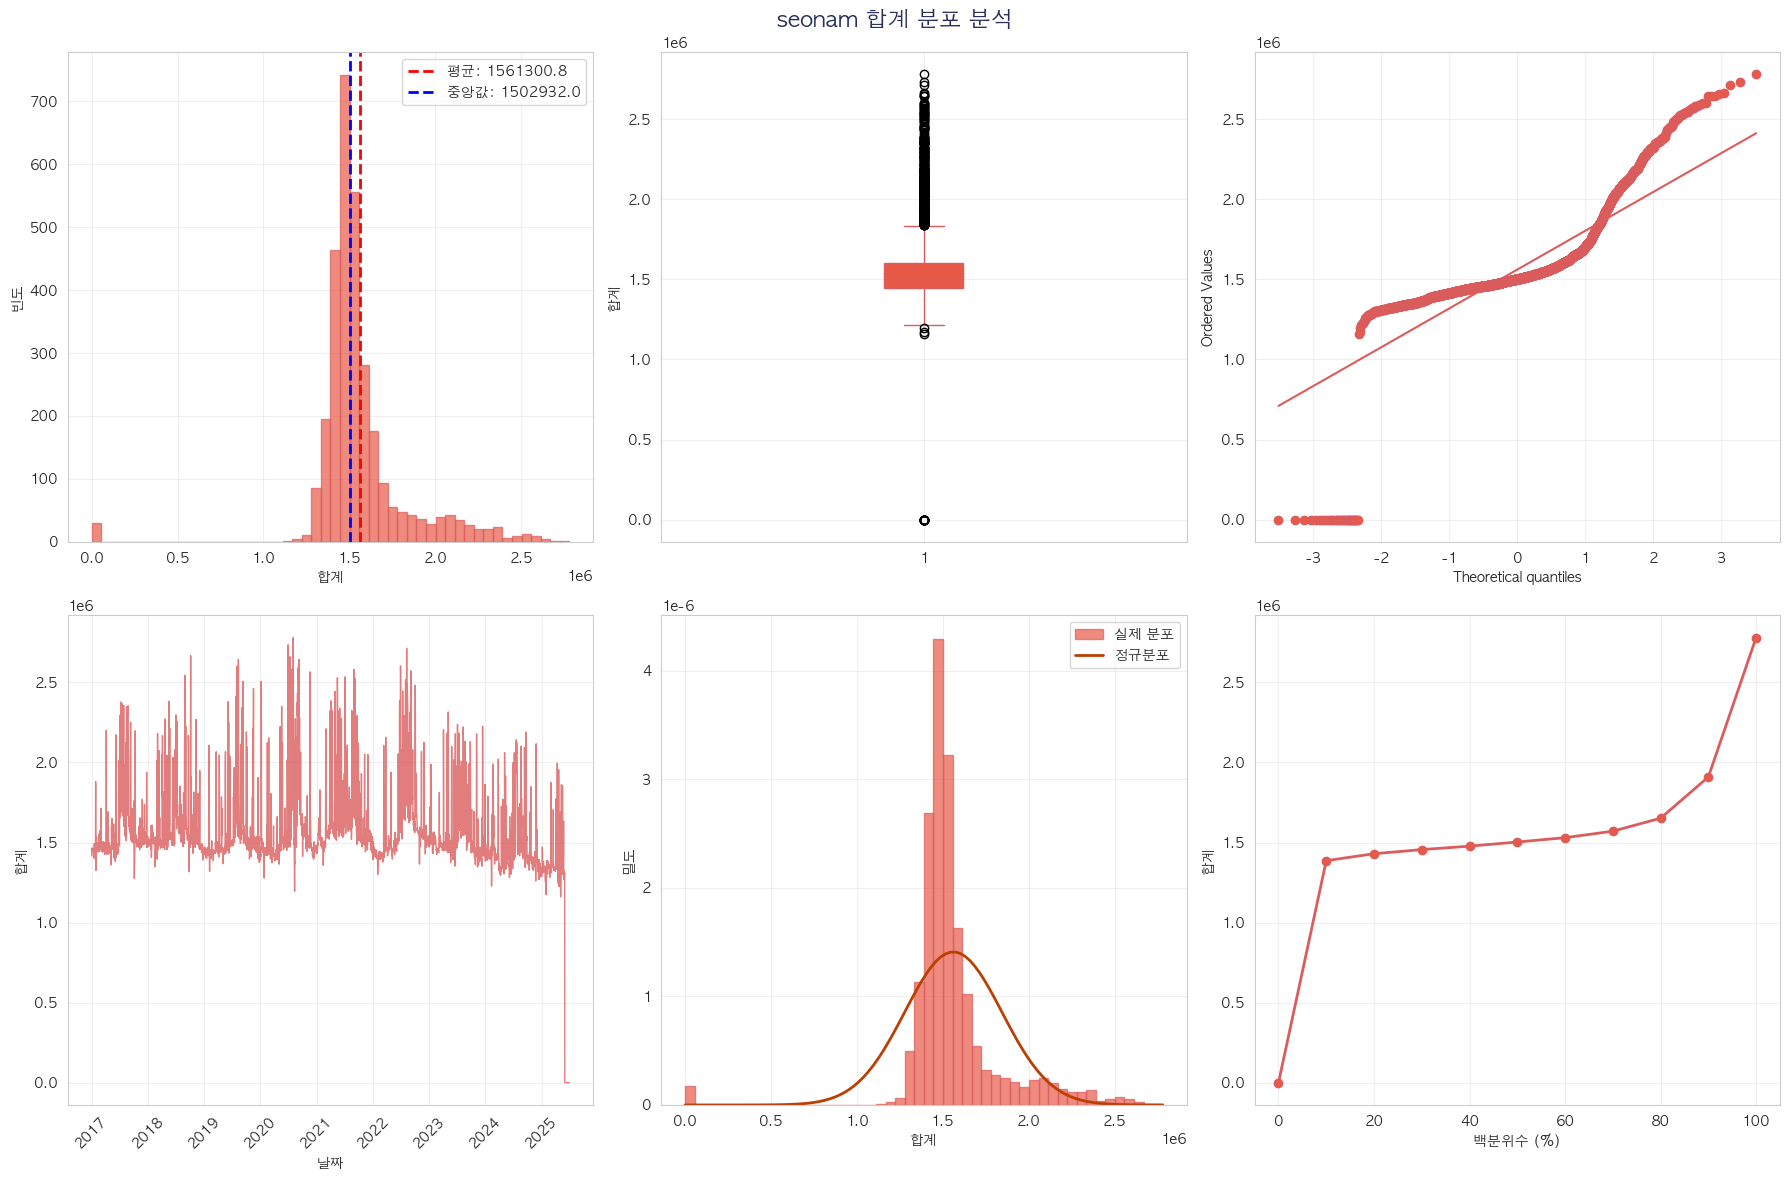


[tancheon] 합계
=== tancheon 합계 분포 분석 ===
데이터 개수: 3103
결측치: 0개

기본 통계량:
  평균: 745374.0
  표준편차: 108245.5
  중앙값: 717600.0
  최솟값: 543425.0
  최댓값: 1423827.0
  범위: 880402.0

분위수:
   5%: 639806.6
  10%: 652014.0
  25%: 677400.0
  50%: 717600.0
  75%: 775717.0
  90%: 874285.6
  95%: 967330.7
  99%: 1181544.4

정규성 검정 (Shapiro-Wilk):
  통계량: 0.8071
  p-값: 1.39e-51
  정규분포 여부: 아니오

분포 형태:
  왜도 (Skewness): 2.165 (오른쪽 치우침)
  첨도 (Kurtosis): 6.252 (뾰족함)

이상치 분석 (IQR 방법):
  IQR: 98317.0
  하한: 529924.5
  상한: 923192.5
  이상치 개수: 202개 (6.5%)
  이상치 범위: 923700.0 ~ 1423827.0


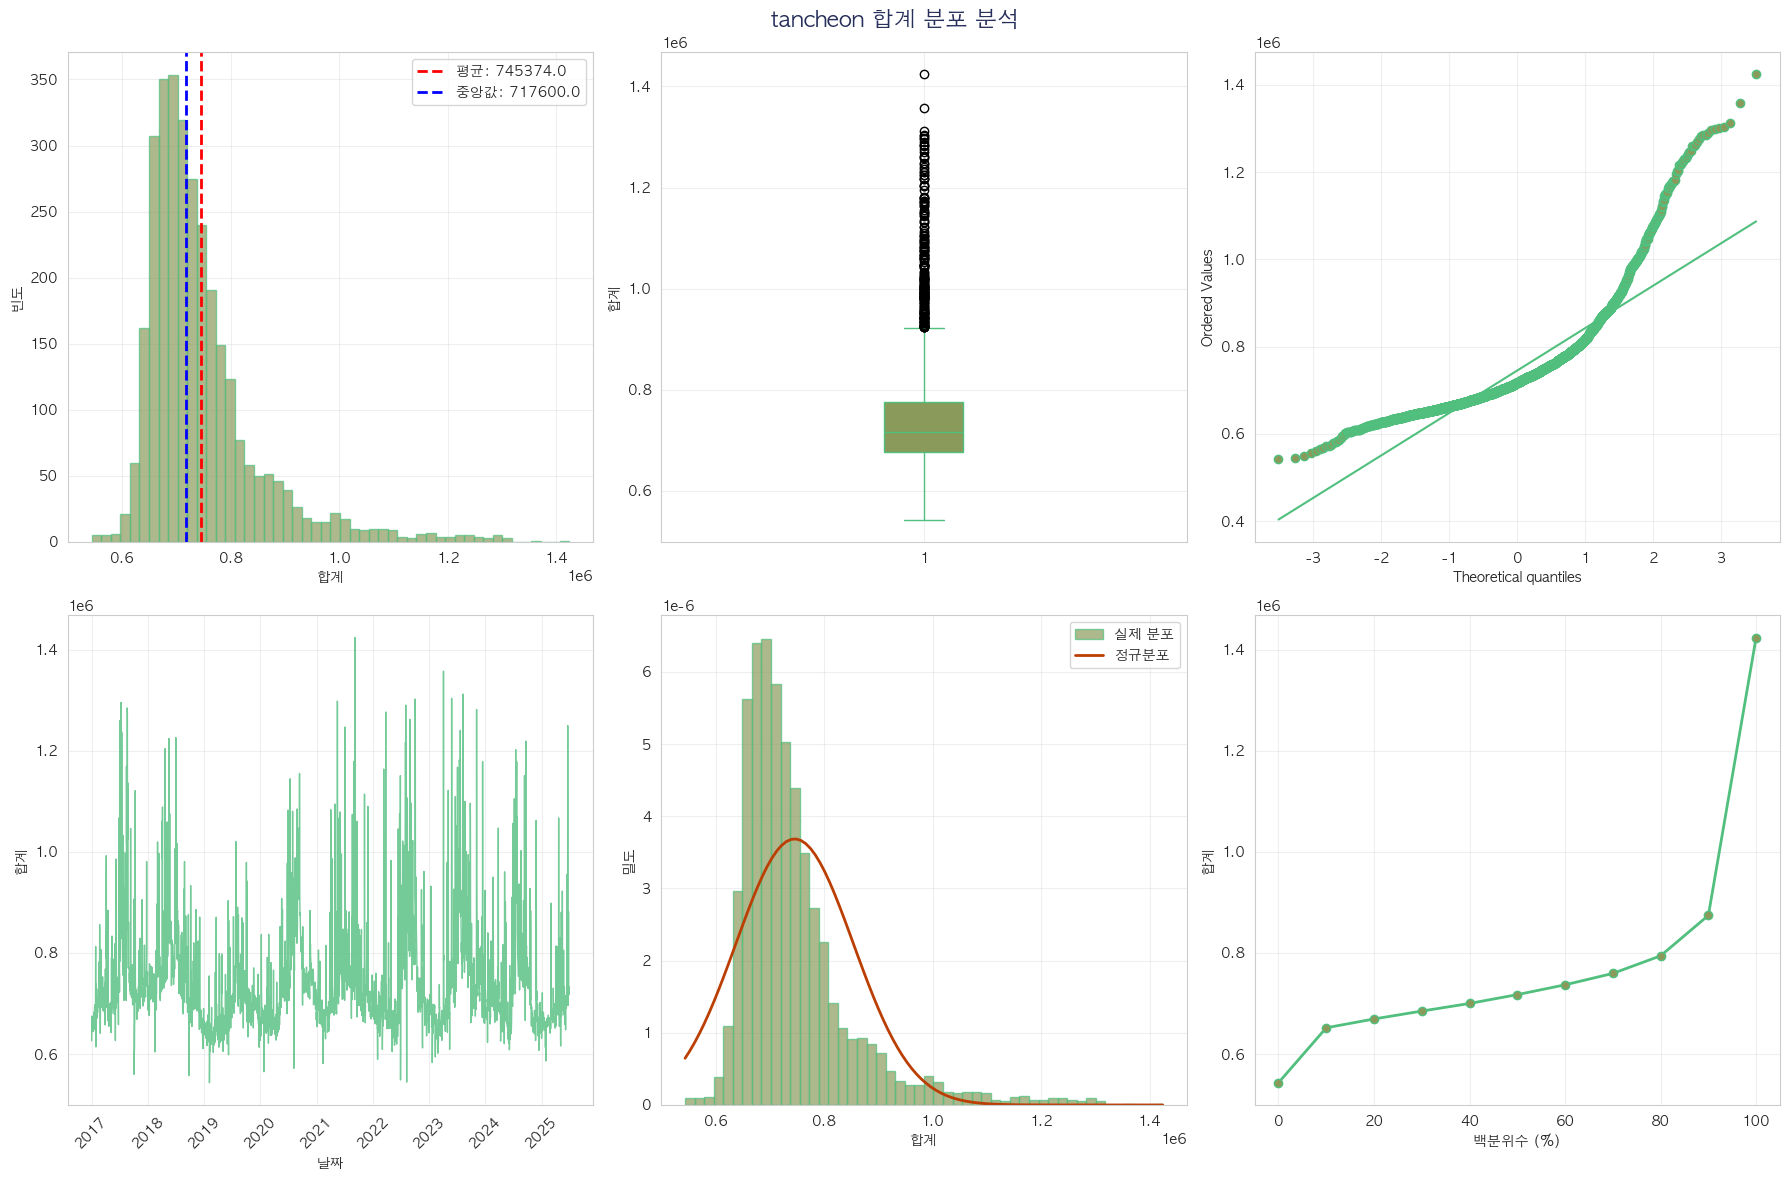


=== 센터별 비교 요약 ===
                mean        std     median       min        max  skewness  \
nanji      598017.89  144947.56   555680.0       0.0  1381444.0      1.28   
jungnang  1278201.94  197021.20  1221904.0  101840.0  2745792.0      2.31   
seonam    1561300.76  283081.86  1502932.0       0.0  2780034.0     -0.26   
tancheon   745373.96  108245.53   717600.0  543425.0  1423827.0      2.16   

          kurtosis  outlier_count  outlier_ratio  
nanji         6.84          393.0           0.13  
jungnang      8.72          298.0           0.10  
seonam       10.05          394.0           0.13  
tancheon      6.25          202.0           0.07  


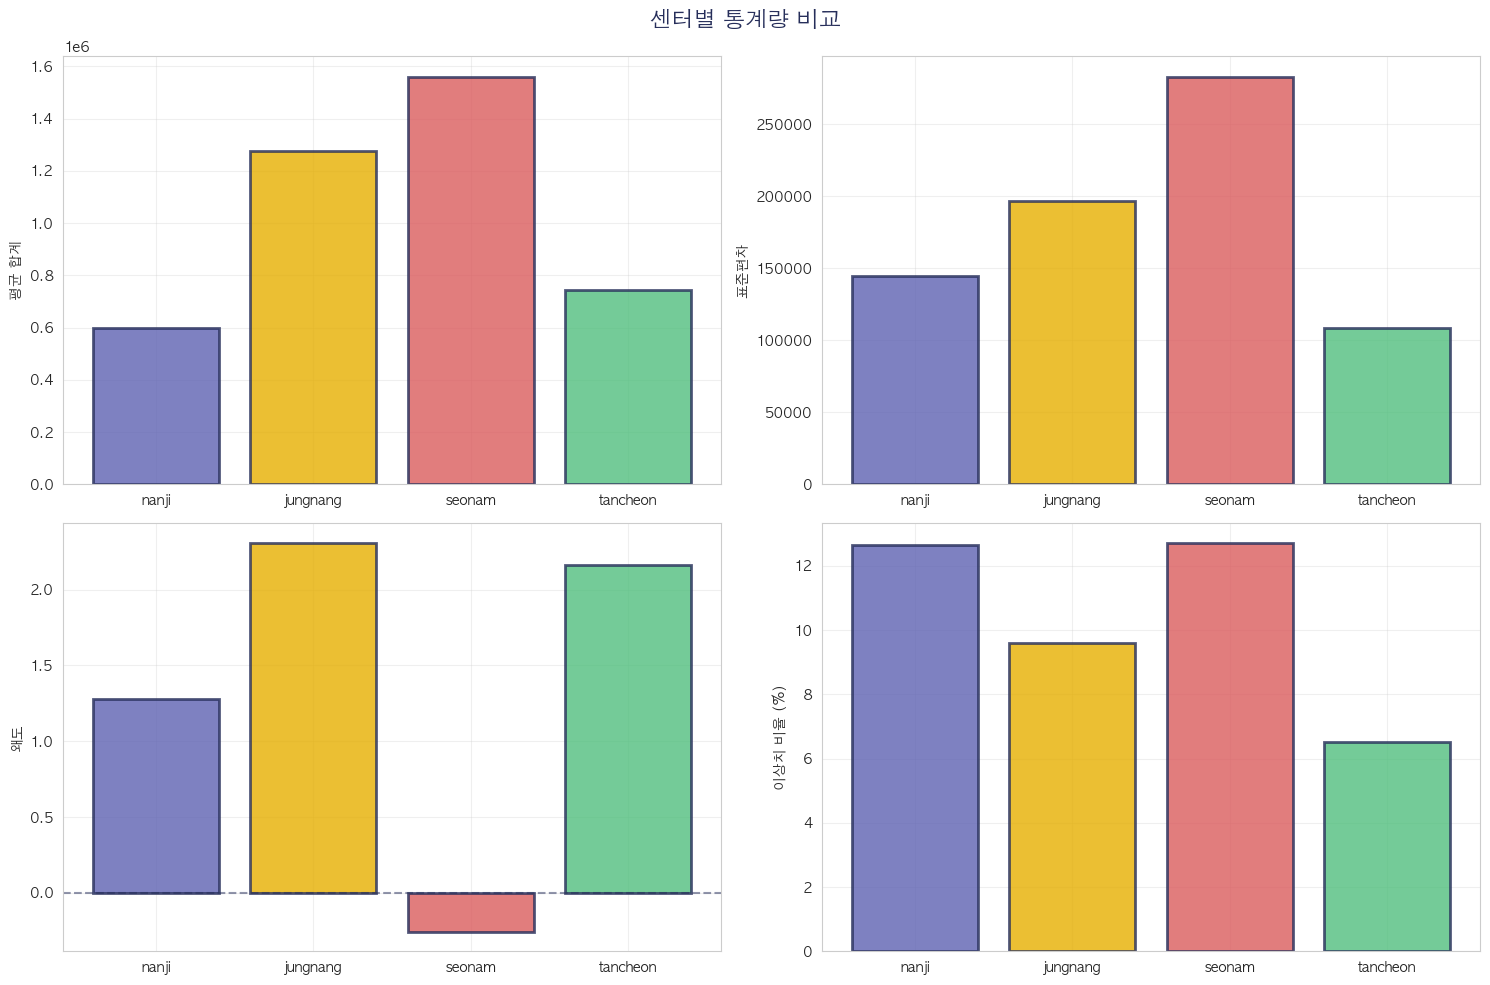

In [8]:
# 센터별 하수처리량 합계 분포분석 (색상표 적용)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ================================
# 색상표 정의
# ================================
# 등급분류용 그라데이션 색상
GRADE_COLORS = ["#1A2A80", "#3B38A0", "#7A85C1", "#B2B0E8"]

# 메인 색상
MAIN_COLOR = "#262E5A"

# 센터별 색상
CENTER_COLORS = {
    "nanji": "#5E62B2",     # 난지: 청록
    "jungnang": "#E6AF00",  # 중랑: 주황
    "seonam": "#DA5C5D",    # 서남: 빨강
    "tancheon": "#51BF7E",  # 탄천: 올리브 그린
}



# 분포 분석용 보조 색상 (각 센터별 연한 버전)
CENTER_LIGHT_COLORS = {
    "nanji": "#4A9AA6",     # 난지 연한 버전
    "jungnang": "#FFD147",  # 중랑 연한 버전
    "seonam": "#E85A47",    # 서남 연한 버전
    "tancheon": "#8A9A5B",  # 탄천 연한 버전
}

def analyze_target_distribution(df, target_col='합계', center_name=''):
    """타깃 변수의 분포를 종합 분석"""
    
    series = pd.to_numeric(df[target_col], errors='coerce').dropna()
    print(f"=== {center_name} {target_col} 분포 분석 ===")
    print(f"데이터 개수: {len(series)}")
    print(f"결측치: {df[target_col].isna().sum()}개")
    
    # 기본 통계량
    print(f"\n기본 통계량:")
    print(f"  평균: {series.mean():.1f}")
    print(f"  표준편차: {series.std():.1f}")
    print(f"  중앙값: {series.median():.1f}")
    print(f"  최솟값: {series.min():.1f}")
    print(f"  최댓값: {series.max():.1f}")
    print(f"  범위: {series.max() - series.min():.1f}")
    
    # 분위수 정보
    quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    print(f"\n분위수:")
    for q in quantiles:
        print(f"  {q*100:2.0f}%: {series.quantile(q):8.1f}")
    
    # 정규성 검정
    shapiro_stat, shapiro_p = stats.shapiro(series.sample(min(5000, len(series))))
    print(f"\n정규성 검정 (Shapiro-Wilk):")
    print(f"  통계량: {shapiro_stat:.4f}")
    print(f"  p-값: {shapiro_p:.2e}")
    print(f"  정규분포 여부: {'아니오' if shapiro_p < 0.05 else '예'}")
    
    # 왜도와 첨도
    skewness = stats.skew(series)
    kurtosis = stats.kurtosis(series)
    print(f"\n분포 형태:")
    print(f"  왜도 (Skewness): {skewness:.3f} ({'오른쪽 치우침' if skewness > 0.5 else '왼쪽 치우침' if skewness < -0.5 else '대칭적'})")
    print(f"  첨도 (Kurtosis): {kurtosis:.3f} ({'뾰족함' if kurtosis > 0 else '평평함'})")
    
    # 이상치 분석
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = series[(series < lower_fence) | (series > upper_fence)]
    
    print(f"\n이상치 분석 (IQR 방법):")
    print(f"  IQR: {IQR:.1f}")
    print(f"  하한: {lower_fence:.1f}")
    print(f"  상한: {upper_fence:.1f}")
    print(f"  이상치 개수: {len(outliers)}개 ({len(outliers)/len(series)*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  이상치 범위: {outliers.min():.1f} ~ {outliers.max():.1f}")
    
    return {
        'series': series,
        'stats': {
            'mean': series.mean(),
            'std': series.std(),
            'median': series.median(),
            'min': series.min(),
            'max': series.max(),
            'skewness': skewness,
            'kurtosis': kurtosis,
            'outlier_count': len(outliers),
            'outlier_ratio': len(outliers)/len(series)
        }
    }

def plot_target_distribution(df, target_col='합계', center_name=''):
    """타깃 변수 분포 시각화 (센터별 색상 적용)"""
    
    series = pd.to_numeric(df[target_col], errors='coerce').dropna()
    
    # 센터별 색상 선택
    center_key = center_name.lower().strip()
    main_color = CENTER_COLORS.get(center_key, MAIN_COLOR)
    light_color = CENTER_LIGHT_COLORS.get(center_key, main_color)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'{center_name} {target_col} 분포 분석', fontsize=16, color=MAIN_COLOR)
    
    # 1. 히스토그램
    axes[0,0].hist(series, bins=50, alpha=0.7, color=light_color, edgecolor=main_color, linewidth=1)
    axes[0,0].axvline(series.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {series.mean():.1f}')
    axes[0,0].axvline(series.median(), color='blue', linestyle='--', linewidth=2, label=f'중앙값: {series.median():.1f}')
    # axes[0,0].set_title('히스토그램', fontsize=12, color=MAIN_COLOR)
    axes[0,0].set_xlabel(target_col)
    axes[0,0].set_ylabel('빈도')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. 박스플롯
    box = axes[0,1].boxplot(series, patch_artist=True)
    box['boxes'][0].set_facecolor(light_color)
    box['boxes'][0].set_edgecolor(main_color)
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        if element in box:
            for item in box[element]:
                item.set_color(main_color)
    # axes[0,1].set_title('박스플롯', fontsize=12, color=MAIN_COLOR)
    axes[0,1].set_ylabel(target_col)
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Q-Q plot (정규분포와 비교)
    stats.probplot(series, dist="norm", plot=axes[0,2])
    axes[0,2].get_lines()[0].set_markerfacecolor(light_color)
    axes[0,2].get_lines()[0].set_markeredgecolor(main_color)
    axes[0,2].get_lines()[1].set_color(main_color)
    # axes[0,2].set_title('Q-Q Plot (정규분포 비교)', fontsize=12, color=MAIN_COLOR)
    axes[0,2].set_title('')
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. 시계열 플롯
    if '날짜' in df.columns:
        df_plot = df.copy()
        df_plot['날짜'] = pd.to_datetime(df_plot['날짜'])
        df_plot = df_plot.sort_values('날짜')
        axes[1,0].plot(df_plot['날짜'], df_plot[target_col], alpha=0.8, color=main_color, linewidth=1)
        # axes[1,0].set_title('시계열 변화', fontsize=12, color=MAIN_COLOR)
        axes[1,0].set_xlabel('날짜')
        axes[1,0].set_ylabel(target_col)
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].grid(True, alpha=0.3)
    
    # 5. 밀도 플롯
    axes[1,1].hist(series, bins=50, density=True, alpha=0.7, color=light_color, 
                  edgecolor=main_color, linewidth=1, label='실제 분포')
    # 정규분포 오버레이
    x = np.linspace(series.min(), series.max(), 100)
    normal_curve = stats.norm.pdf(x, series.mean(), series.std())
    axes[1,1].plot(x, normal_curve, color='#BB3E03', linewidth=2, label='정규분포')
    # axes[1,1].set_title('밀도 분포', fontsize=12, color=MAIN_COLOR)
    axes[1,1].set_xlabel(target_col)
    axes[1,1].set_ylabel('밀도')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    # 6. 분위수별 구간 시각화
    quantiles = np.arange(0, 1.1, 0.1)
    q_values = [series.quantile(q) for q in quantiles]
    axes[1,2].plot(quantiles*100, q_values, 'o-', color=main_color, markerfacecolor=light_color, 
                  markeredgecolor=main_color, linewidth=2, markersize=6)
    # axes[1,2].set_title('분위수 곡선', fontsize=12, color=MAIN_COLOR)
    axes[1,2].set_xlabel('백분위수 (%)')
    axes[1,2].set_ylabel(target_col)
    axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def comprehensive_target_analysis(centers_dict):
    """모든 센터의 타깃 변수 종합 분석"""
    
    all_stats = {}
    
    for center_name, df in centers_dict.items():
        print(f"\n{'='*60}")
        
        # 원본 합계 분석
        print(f"[{center_name}] 합계")
        stats_original = analyze_target_distribution(df, '합계', center_name)
        
        all_stats[center_name] = {
            'original': stats_original['stats']
        }
        
        # 분포 시각화
        plot_target_distribution(df, '합계', center_name)
    
    # 센터 간 비교
    print(f"\n{'='*60}")
    print("=== 센터별 비교 요약 ===")
    
    comparison_df = pd.DataFrame({
        center: stats['original'] 
        for center, stats in all_stats.items()
    }).T.round(2)
    
    print(comparison_df)
    
    # 센터별 비교 시각화
    plot_center_comparison(all_stats)
    
    return all_stats

def plot_center_comparison(all_stats):
    """센터별 통계량 비교 시각화"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('센터별 통계량 비교', fontsize=16, color=MAIN_COLOR)
    
    centers = list(all_stats.keys())
    
    # 1. 평균 비교
    means = [all_stats[center]['original']['mean'] for center in centers]
    colors = [CENTER_COLORS[center] for center in centers]
    
    bars1 = axes[0,0].bar(centers, means, color=colors, alpha=0.8, edgecolor=MAIN_COLOR, linewidth=2)
    # axes[0,0].set_title('평균 비교', fontsize=12, color=MAIN_COLOR)
    axes[0,0].set_ylabel('평균 합계')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. 표준편차 비교
    stds = [all_stats[center]['original']['std'] for center in centers]
    bars2 = axes[0,1].bar(centers, stds, color=colors, alpha=0.8, edgecolor=MAIN_COLOR, linewidth=2)
    # axes[0,1].set_title('표준편차 비교', fontsize=12, color=MAIN_COLOR)
    axes[0,1].set_ylabel('표준편차')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. 왜도 비교
    skewness = [all_stats[center]['original']['skewness'] for center in centers]
    bars3 = axes[1,0].bar(centers, skewness, color=colors, alpha=0.8, edgecolor=MAIN_COLOR, linewidth=2)
    # axes[1,0].set_title('왜도 비교', fontsize=12, color=MAIN_COLOR)
    axes[1,0].set_ylabel('왜도')
    axes[1,0].axhline(y=0, color=MAIN_COLOR, linestyle='--', alpha=0.5)
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. 이상치 비율 비교
    outlier_ratios = [all_stats[center]['original']['outlier_ratio']*100 for center in centers]
    bars4 = axes[1,1].bar(centers, outlier_ratios, color=colors, alpha=0.8, edgecolor=MAIN_COLOR, linewidth=2)
    # axes[1,1].set_title('이상치 비율 비교', fontsize=12, color=MAIN_COLOR)
    axes[1,1].set_ylabel('이상치 비율 (%)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 데이터 로드
centers_dict = {
    "nanji": pd.read_csv('../data/processed/center_season/nanji/난지_merged.csv', encoding='utf-8-sig'),
    "jungnang": pd.read_csv('../data/processed/center_season/jungnang/중랑_merged.csv', encoding='utf-8-sig'), 
    "seonam": pd.read_csv('../data/processed/center_season/seonam/서남_merged.csv', encoding='utf-8-sig'),
    "tancheon": pd.read_csv('../data/processed/center_season/tancheon/탄천_merged.csv', encoding='utf-8-sig')
}

# 전체 분석 실행
all_stats = comprehensive_target_analysis(centers_dict)

=== 난지 센터 개별 분포 그래프 ===
각 그래프를 개별적으로 출력합니다.

1. 히스토그램


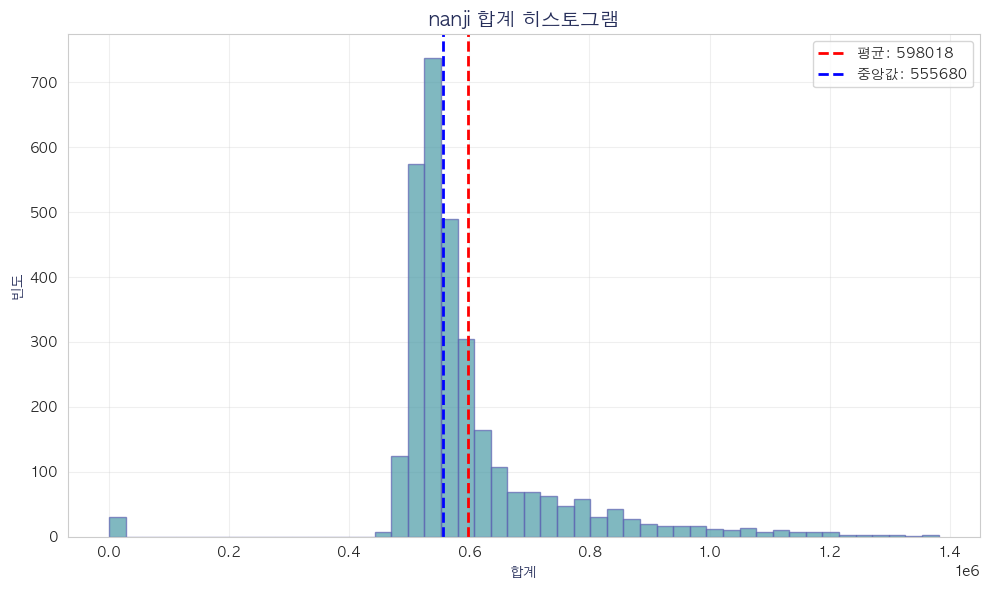

2. 박스플롯


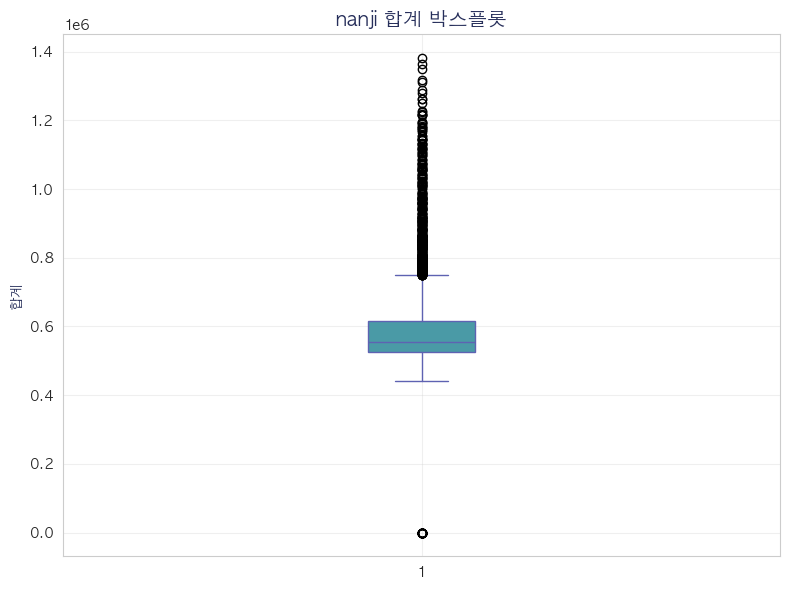

3. Q-Q Plot


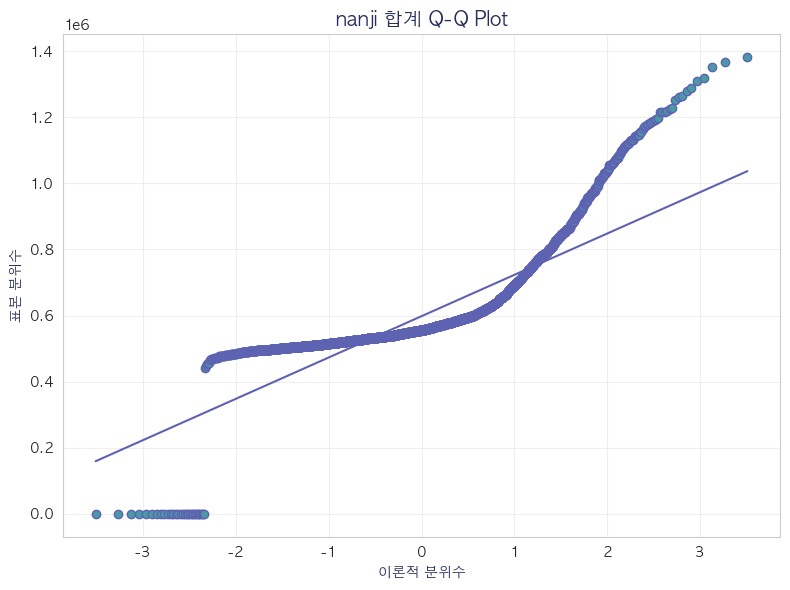

4. 시계열 플롯


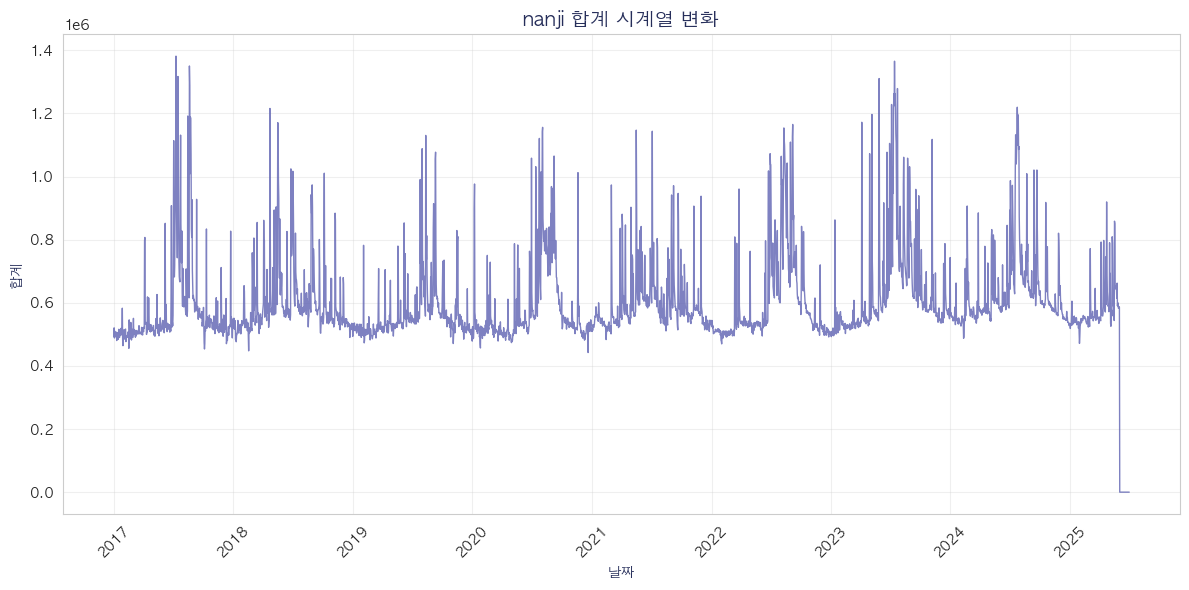

5. 밀도 플롯


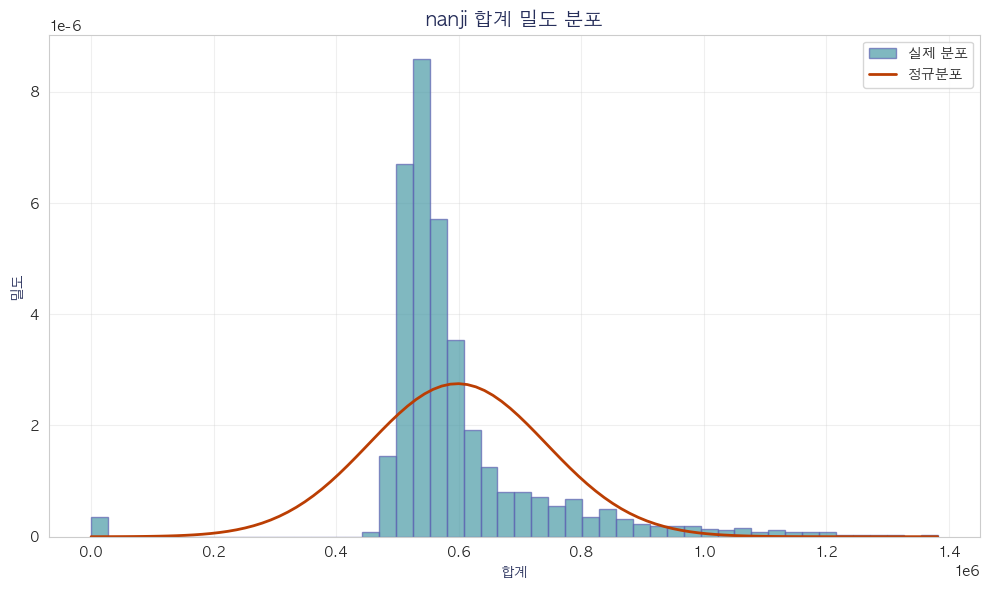

6. 분위수 곡선


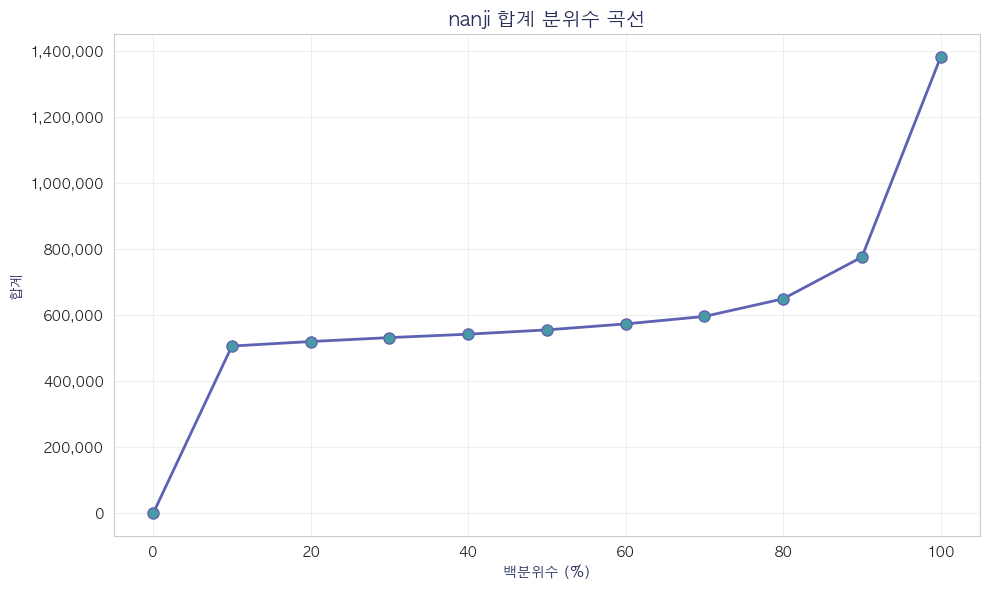


=== 난지 센터 개별 분석 완료 ===


In [9]:
'''
히스토그램: 평균, 중앙값 선 포함
박스플롯: 이상치와 분위수 표시
Q-Q Plot: 정규분포와의 비교
시계열 플롯: 시간에 따른 변화
밀도 플롯: 실제 분포 vs 정규분포
분위수 곡선: 백분위수별 값 표시
'''
# 난지 센터 개별 분포 그래프 (6개 각각 출력)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ================================
# 색상표 정의
# ================================
MAIN_COLOR = "#262E5A"
CENTER_COLORS = {
    "nanji": "#5E62B2",     # 난지
    "jungnang": "#E6AF00",  # 중랑
    "seonam": "#DA5C5D",    # 서남
    "tancheon": "#51BF7E",  # 탄천
}

CENTER_LIGHT_COLORS = {
    "nanji": "#4A9AA6",     # 난지 연한 버전
    "jungnang": "#FFD147",  # 중랑 연한 버전
    "seonam": "#E85A47",    # 서남 연한 버전
    "tancheon": "#8A9A5B",  # 탄천 연한 버전
}

def plot_individual_histogram(df, target_col='합계', center_name='nanji'):
    """1. 히스토그램"""
    series = pd.to_numeric(df[target_col], errors='coerce').dropna()
    center_key = center_name.lower().strip()
    main_color = CENTER_COLORS.get(center_key, MAIN_COLOR)
    light_color = CENTER_LIGHT_COLORS.get(center_key, main_color)
    
    plt.figure(figsize=(10, 6))
    plt.hist(series, bins=50, alpha=0.7, color=light_color, edgecolor=main_color, linewidth=1)
    plt.axvline(series.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {series.mean():.0f}')
    plt.axvline(series.median(), color='blue', linestyle='--', linewidth=2, label=f'중앙값: {series.median():.0f}')
    plt.title(f'{center_name} {target_col} 히스토그램', fontsize=14, fontweight='bold', color=MAIN_COLOR)
    plt.xlabel(target_col, fontweight='bold', color=MAIN_COLOR)
    plt.ylabel('빈도', fontweight='bold', color=MAIN_COLOR)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_individual_boxplot(df, target_col='합계', center_name='nanji'):
    """2. 박스플롯"""
    series = pd.to_numeric(df[target_col], errors='coerce').dropna()
    center_key = center_name.lower().strip()
    main_color = CENTER_COLORS.get(center_key, MAIN_COLOR)
    light_color = CENTER_LIGHT_COLORS.get(center_key, main_color)
    
    plt.figure(figsize=(8, 6))
    box = plt.boxplot(series, patch_artist=True)
    box['boxes'][0].set_facecolor(light_color)
    box['boxes'][0].set_edgecolor(main_color)
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        if element in box:
            for item in box[element]:
                item.set_color(main_color)
    plt.title(f'{center_name} {target_col} 박스플롯', fontsize=14, fontweight='bold', color=MAIN_COLOR)
    plt.ylabel(target_col, fontweight='bold', color=MAIN_COLOR)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_individual_qqplot(df, target_col='합계', center_name='nanji'):
    """3. Q-Q Plot"""
    series = pd.to_numeric(df[target_col], errors='coerce').dropna()
    center_key = center_name.lower().strip()
    main_color = CENTER_COLORS.get(center_key, MAIN_COLOR)
    light_color = CENTER_LIGHT_COLORS.get(center_key, main_color)
    
    plt.figure(figsize=(8, 6))
    stats.probplot(series, dist="norm", plot=plt)
    plt.gca().get_lines()[0].set_markerfacecolor(light_color)
    plt.gca().get_lines()[0].set_markeredgecolor(main_color)
    plt.gca().get_lines()[1].set_color(main_color)
    plt.title(f'{center_name} {target_col} Q-Q Plot', fontsize=14, fontweight='bold', color=MAIN_COLOR)
    plt.xlabel('이론적 분위수', fontweight='bold', color=MAIN_COLOR)
    plt.ylabel('표본 분위수', fontweight='bold', color=MAIN_COLOR)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_individual_timeseries(df, target_col='합계', center_name='nanji'):
    """4. 시계열 플롯"""
    center_key = center_name.lower().strip()
    main_color = CENTER_COLORS.get(center_key, MAIN_COLOR)
    
    if '날짜' in df.columns:
        df_plot = df.copy()
        df_plot['날짜'] = pd.to_datetime(df_plot['날짜'])
        df_plot = df_plot.sort_values('날짜')
        
        plt.figure(figsize=(12, 6))
        plt.plot(df_plot['날짜'], df_plot[target_col], alpha=0.8, color=main_color, linewidth=1)
        plt.title(f'{center_name} {target_col} 시계열 변화', fontsize=14, fontweight='bold', color=MAIN_COLOR)
        plt.xlabel('날짜', fontweight='bold', color=MAIN_COLOR)
        plt.ylabel(target_col, fontweight='bold', color=MAIN_COLOR)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

def plot_individual_density(df, target_col='합계', center_name='nanji'):
    """5. 밀도 플롯"""
    series = pd.to_numeric(df[target_col], errors='coerce').dropna()
    center_key = center_name.lower().strip()
    main_color = CENTER_COLORS.get(center_key, MAIN_COLOR)
    light_color = CENTER_LIGHT_COLORS.get(center_key, main_color)
    
    plt.figure(figsize=(10, 6))
    plt.hist(series, bins=50, density=True, alpha=0.7, color=light_color, 
             edgecolor=main_color, linewidth=1, label='실제 분포')
    
    # 정규분포 오버레이
    x = np.linspace(series.min(), series.max(), 100)
    normal_curve = stats.norm.pdf(x, series.mean(), series.std())
    plt.plot(x, normal_curve, color='#BB3E03', linewidth=2, label='정규분포')
    
    plt.title(f'{center_name} {target_col} 밀도 분포', fontsize=14, fontweight='bold', color=MAIN_COLOR)
    plt.xlabel(target_col, fontweight='bold', color=MAIN_COLOR)
    plt.ylabel('밀도', fontweight='bold', color=MAIN_COLOR)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_individual_quantiles(df, target_col='합계', center_name='nanji'):
    """6. 분위수 곡선"""
    series = pd.to_numeric(df[target_col], errors='coerce').dropna()
    center_key = center_name.lower().strip()
    main_color = CENTER_COLORS.get(center_key, MAIN_COLOR)
    light_color = CENTER_LIGHT_COLORS.get(center_key, main_color)
    
    plt.figure(figsize=(10, 6))
    quantiles = np.arange(0, 1.1, 0.1)
    q_values = [series.quantile(q) for q in quantiles]
    plt.plot(quantiles*100, q_values, 'o-', color=main_color, markerfacecolor=light_color, 
             markeredgecolor=main_color, linewidth=2, markersize=8)
    plt.title(f'{center_name} {target_col} 분위수 곡선', fontsize=14, fontweight='bold', color=MAIN_COLOR)
    plt.xlabel('백분위수 (%)', fontweight='bold', color=MAIN_COLOR)
    plt.ylabel(target_col, fontweight='bold', color=MAIN_COLOR)
    
    # Y축 과학적 표기법 제거
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_plain))
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def run_nanji_individual_analysis():
    """난지 센터 개별 분석 실행"""
    # 난지 데이터 로드
    nanji_df = pd.read_csv('../data/processed/center_season/nanji/난지_merged.csv', encoding='utf-8-sig')
    
    print("=== 난지 센터 개별 분포 그래프 ===")
    print("각 그래프를 개별적으로 출력합니다.\n")
    
    print("1. 히스토그램")
    plot_individual_histogram(nanji_df, '합계', 'nanji')
    
    print("2. 박스플롯")
    plot_individual_boxplot(nanji_df, '합계', 'nanji')
    
    print("3. Q-Q Plot")
    plot_individual_qqplot(nanji_df, '합계', 'nanji')
    
    print("4. 시계열 플롯")
    plot_individual_timeseries(nanji_df, '합계', 'nanji')
    
    print("5. 밀도 플롯")
    plot_individual_density(nanji_df, '합계', 'nanji')
    
    print("6. 분위수 곡선")
    plot_individual_quantiles(nanji_df, '합계', 'nanji')
    
    print("\n=== 난지 센터 개별 분석 완료 ===")

# 실행
run_nanji_individual_analysis()

[nanji] shape=(3069, 44), columns=44


,날짜,요일,공휴일,목욕장업,세탁업,수영장업,종합체육시설업,체력단련장업,하천,생활인구,...,강수량_5일_누적,강수량_7일_누적,일교차,폭우_여부,체감온도(°C),등급,합계_1일후,합계_2일후,등급_1일후,등급_2일후
0,2017-01-03,1,0,210,939,28,26,779,0.0,2021411.02,...,0.0,0.0,8.42,0,1.24074,0,510180.0,496289.0,0,0
1,2017-01-04,2,0,210,939,28,26,779,0.0,2016146.44,...,0.0,0.0,7.39,0,1.03715,0,496289.0,492958.0,0,0


[jungnang] shape=(3069, 44), columns=44


,날짜,요일,공휴일,목욕장업,세탁업,수영장업,종합체육시설업,체력단련장업,하천,생활인구,...,강수량_5일_누적,강수량_7일_누적,일교차,폭우_여부,체감온도(°C),등급,합계_1일후,합계_2일후,등급_1일후,등급_2일후
0,2017-01-03,1,0,353,2113,46,35,1355,0.0,3631853.44,...,1.5,1.5,8.46,0,1.596694,1,1225081.0,1215632.0,1,1
1,2017-01-04,2,0,353,2113,46,35,1355,0.0,3639234.09,...,1.5,1.5,8.08,0,1.439929,1,1215632.0,1249242.0,1,1


[seonam] shape=(3069, 43), columns=43


,날짜,요일,공휴일,목욕장업,세탁업,수영장업,종합체육시설업,체력단련장업,하천,생활인구,...,강수량_5일_누적,강수량_7일_누적,일교차,폭우_여부,체감온도(°C),등급,합계_1일후,합계_2일후,등급_1일후,등급_2일후
0,2017-01-03,1,0,454,2253,64,48,2212,0.0,4163121.84,...,0.2,0.2,8.17,0,-0.204226,1,1460573.0,1455815.0,1,1
1,2017-01-04,2,0,454,2253,64,48,2212,0.0,4147625.47,...,0.2,0.2,7.64,0,1.672846,1,1455815.0,1452640.0,1,1


[tancheon] shape=(3069, 42), columns=42


,날짜,요일,공휴일,목욕장업,세탁업,수영장업,종합체육시설업,체력단련장업,하천,생활인구,...,강수량_5일_누적,강수량_7일_누적,일교차,폭우_여부,체감온도(°C),등급,합계_1일후,합계_2일후,등급_1일후,등급_2일후
0,2017-01-03,1,0,189,1017,39,41,1143,0.0,2008282.48,...,0.0,0.0,8.02,0,0.232826,1,671066.0,656065.0,1,0
1,2017-01-04,2,0,189,1017,39,41,1143,0.0,1999705.18,...,0.0,0.0,7.68,0,1.957355,1,656065.0,660300.0,0,0


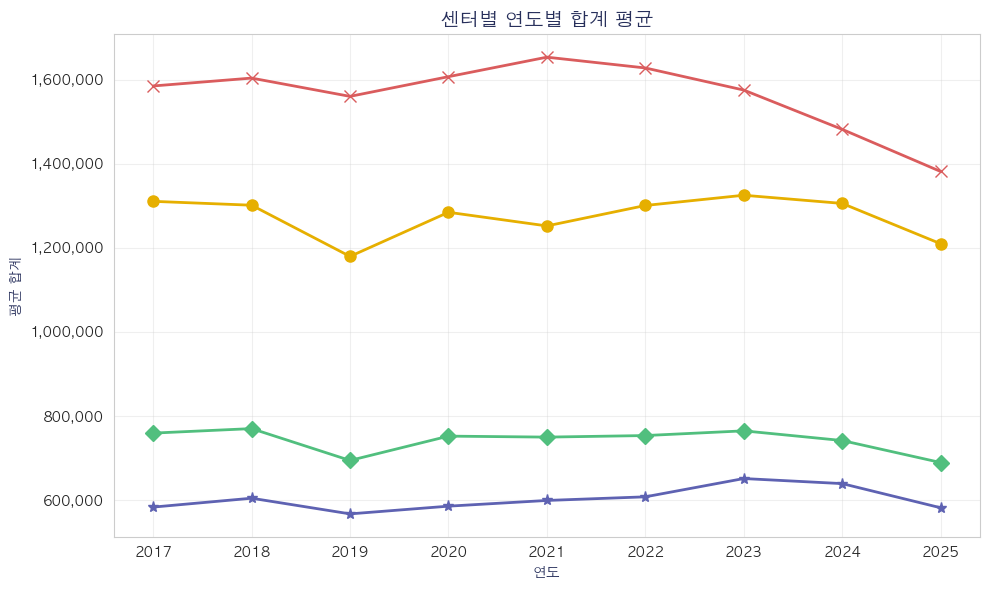

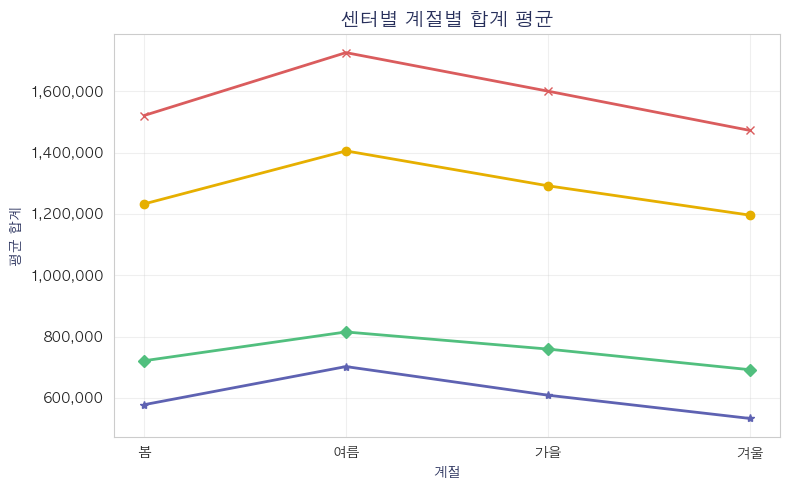

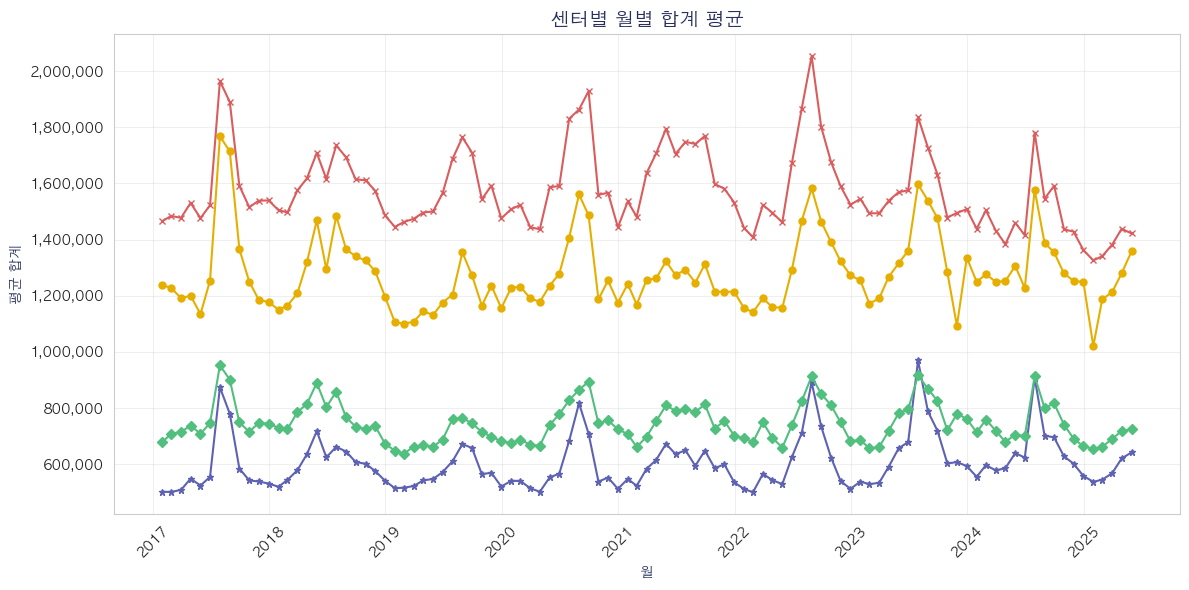

In [10]:
# 센터별 연도별/계절별/월별 합계 평균 그래프(과학적 표기법 제거)

# ================================
# 0. 환경 세팅 (새로운 색상표 적용)
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from cycler import cycler
from matplotlib.ticker import FuncFormatter

# 새로운 색상표 적용
# 등급분류용 그라데이션 색상
GRADE_COLORS = ["#1A2A80", "#3B38A0", "#7A85C1", "#B2B0E8"]

# 메인 색상
MAIN_COLOR = "#262E5A"

# 센터별 색상 (지정된 색상표 적용)

# seaborn, matplotlib 전역 적용 (센터 색상으로)
center_palette = list(CENTER_COLORS.values())
sns.set_palette(center_palette)
mpl.rcParams["axes.prop_cycle"] = cycler(color=center_palette)

# 과학적 표기법 제거를 위한 포맷터 정의
def format_thousands(x, pos):
    """천 단위로 콤마를 추가하는 포맷터"""
    if x >= 1000000:
        return f'{x/1000000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.0f}K'
    else:
        return f'{x:.0f}'

def format_plain(x, pos):
    """일반 숫자 형식 포맷터 (콤마 포함)"""
    return f'{x:,.0f}'

# --- 파일 경로 딕셔너리 ---
paths = {
    "nanji":     "../data/add_feature/nanji_add_feature.csv",
    "jungnang":  "../data/add_feature/jungnang_add_feature.csv",
    "seonam":    "../data/add_feature/seonam_add_feature.csv",
    "tancheon":  "../data/add_feature/tancheon_add_feature.csv",
}

# --- X에서 제외할 컬럼(타깃/ID/설비 등) ---
not_use_col = [
    "날짜", "1처리장","2처리장","정화조","중계펌프장",
    "시설현대화","3처리장","4처리장",
    "합계","합계_1일후","합계_2일후",
    "등급","등급_1일후","등급_2일후"
]

# --- CSV 로드 (날짜 파싱) ---
dfs = {name: pd.read_csv(path, parse_dates=["날짜"]) for name, path in paths.items()}

# --- 공용 헬퍼: 피처 선택(수치형만) ---
def get_feature_cols(df, not_use):
    cols = [c for c in df.columns if c not in not_use]
    num_cols = df[cols].select_dtypes(include=["number"]).columns.tolist()
    # 상수열 제거(상관계수에서 NaN 방지)
    nunique = df[num_cols].nunique()
    num_cols = [c for c in num_cols if nunique[c] > 1]
    return num_cols

# --- 로드 확인 ---
for name, df in dfs.items():
    print(f"[{name}] shape={df.shape}, columns={len(df.columns)}")
    display(df.head(2))

# 센터별 마커 매핑
CENTER_MARKERS = {
    'nanji': '*',
    'jungnang': 'o', 
    'seonam': 'x',
    'tancheon': 'D',
}

# ================================
# 1. 연도별 합계 평균 그래프
# ================================
plt.figure(figsize=(10,6))
for name, df in dfs.items():
    yearly = df.groupby(df["날짜"].dt.year)["합계"].mean()
    plt.plot(yearly.index, yearly.values, 
             marker=CENTER_MARKERS.get(name, 'o'),
            linewidth=2, markersize=8,
             label=name, color=CENTER_COLORS[name])

# Y축 과학적 표기법 제거
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(format_plain))

# plt.legend(title="센터")
plt.grid(alpha=0.3)
plt.title("센터별 연도별 합계 평균", fontsize=14, color=MAIN_COLOR, fontweight='bold')
plt.xlabel("연도", fontweight='bold', color=MAIN_COLOR)
plt.ylabel("평균 합계", fontweight='bold', color=MAIN_COLOR)
plt.tight_layout()
plt.show()

# ================================
# 2. 계절별 합계 평균 그래프  
# ================================
season_map = {0:"봄", 1:"여름", 2:"가을", 3:"겨울"}
season_order = ["봄","여름","가을","겨울"]

plt.figure(figsize=(8,5))
for name, df in dfs.items():
    df = df.copy()
    df["계절명"] = df["계절"].map(season_map)
    # 계절 순서 고정
    df["계절명"] = pd.Categorical(df["계절명"], categories=season_order, ordered=True)
    seasonal = df.groupby("계절명", observed=False)["합계"].mean()
    plt.plot(seasonal.index, seasonal.values, marker=CENTER_MARKERS.get(name, 'o'), linewidth=2,
             label=name, color=CENTER_COLORS[name])

# Y축 과학적 표기법 제거
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(format_plain))

# plt.legend(title="센터")
plt.grid(alpha=0.3)
plt.title("센터별 계절별 합계 평균", fontsize=14, color=MAIN_COLOR, fontweight='bold')
plt.xlabel("계절", fontweight='bold', color=MAIN_COLOR)
plt.ylabel("평균 합계", fontweight='bold', color=MAIN_COLOR)
plt.tight_layout()
plt.show()

# ================================
# 3. 월별 합계 평균 그래프
# ================================
plt.figure(figsize=(12,6))
for name, df in dfs.items():
    monthly = df.set_index("날짜").resample("M")["합계"].mean()
    plt.plot(monthly.index, monthly.values, 
             marker=CENTER_MARKERS.get(name, 'o'),
             linewidth=1.5,
             label=name, 
             color=CENTER_COLORS[name],
             markersize=5)

# Y축 과학적 표기법 제거
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(format_plain))

# plt.legend(title="센터")
plt.grid(alpha=0.3)
plt.title("센터별 월별 합계 평균", fontsize=14, color=MAIN_COLOR, fontweight='bold')
plt.xlabel("월", fontweight='bold', color=MAIN_COLOR)
plt.ylabel("평균 합계", fontweight='bold', color=MAIN_COLOR)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 추가 옵션: 다른 포맷터들
# ================================

# 1. 단위 표시 포맷터 (K, M 사용)
def format_with_units(x, pos):
    """K, M 단위로 표시"""
    if x >= 1000000:
        return f'{x/1000000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.0f}K'
    else:
        return f'{x:.0f}'

# 2. 소수점 포함 포맷터
def format_with_decimal(x, pos):
    """소수점 1자리 포함"""
    return f'{x:,.1f}'

# 사용 예시:
# ax.yaxis.set_major_formatter(FuncFormatter(format_with_units))
# ax.yaxis.set_major_formatter(FuncFormatter(format_with_decimal))

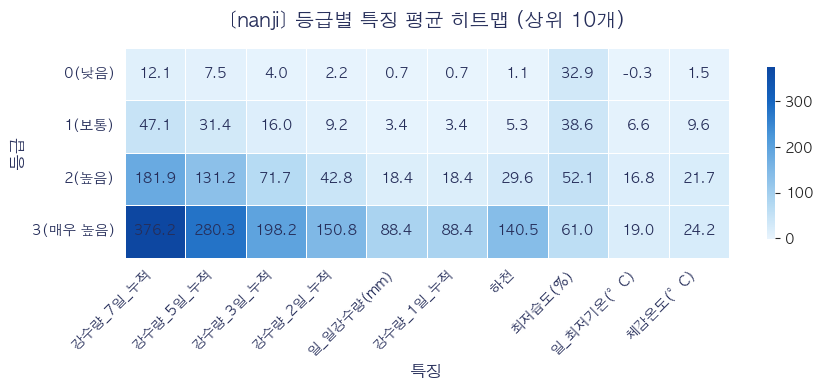

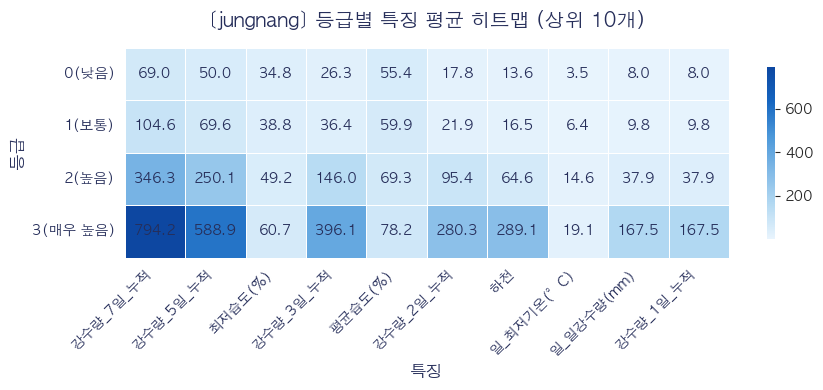

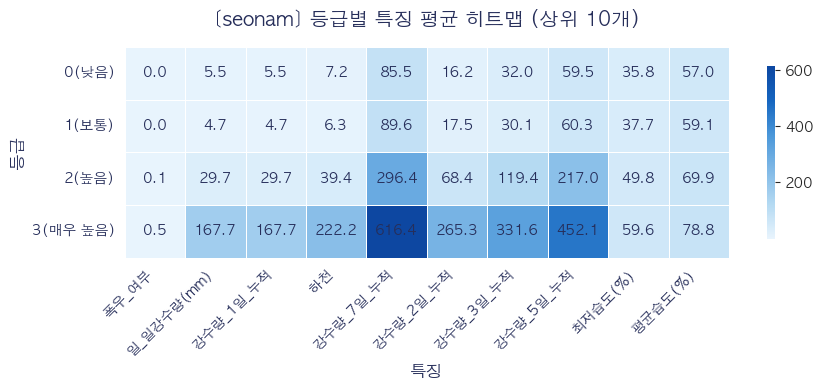

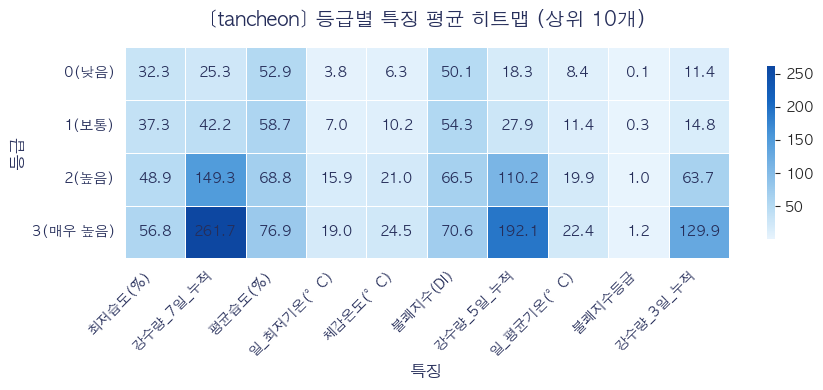

In [11]:
# ================================
# 색상표 정의
# ================================
# 등급분류용 그라데이션 색상 (파랑계열)
GRADE_COLORS = ["#1A2A80", "#3B38A0", "#7A85C1", "#B2B0E8"]

# 메인 색상
MAIN_COLOR = "#262E5A"

# 파랑계열 커스텀 컬러맵 생성
blue_colors = ['#E8F4FD', '#B3D9F2', '#7FB8E6', '#4A97D9', '#1565C0', '#0D47A1']
blue_cmap = sns.blend_palette(blue_colors, as_cmap=True)

CLASS_ORDER = [0, 1, 2, 3]
CLASS_NAMES = {0: "0(낮음)", 1: "1(보통)", 2: "2(높음)", 3: "3(매우 높음)"}

for name, df in dfs.items():
    feature_cols = get_feature_cols(df, not_use_col)
    feature_cols = [c for c in feature_cols if c not in ["합계_1일후","합계_2일후"]]

    corr = (
        df[feature_cols + ["합계_1일후"]]
          .corr(numeric_only=True)["합계_1일후"]
          .drop("합계_1일후").abs().sort_values(ascending=False)
    )
    
    # 상위 10개만 사용
    use_cols = corr.head(10).index.tolist()

    tab = (df.groupby("등급_1일후")[use_cols].mean().reindex(CLASS_ORDER))
    tab.index = [CLASS_NAMES[i] for i in tab.index]

    plt.figure(figsize=(0.5*len(use_cols)+4, 4))
    
    # 파랑계열 히트맵 생성
    sns.heatmap(tab, annot=True, fmt=".1f", linewidths=0.5, linecolor="white",
                cmap=blue_cmap,  # 파랑계열 컬러맵 적용
                cbar_kws={"shrink": .82},
                annot_kws={"fontsize": 10, "color": MAIN_COLOR, "weight": "bold"})
    
    # 제목 색상 적용
    plt.title(f"[{name}] 등급별 특징 평균 히트맵 (상위 10개)", 
              fontsize=14, fontweight='bold', color=MAIN_COLOR, pad=15)
    
    # 축 레이블 색상 적용
    plt.xlabel("특징", fontsize=12, fontweight='bold', color=MAIN_COLOR)
    plt.ylabel("등급", fontsize=12, fontweight='bold', color=MAIN_COLOR)
    
    # x축 틱 회전 및 색상
    plt.xticks(rotation=45, ha='right', color=MAIN_COLOR)
    plt.yticks(rotation=0, color=MAIN_COLOR)
    
    plt.tight_layout()
    plt.show()

데이터 로드 완료: 96개 결과
=== 모델 성능 비교 시각화 (개별 그래프) ===

1. 회귀 모델 R² 성능 그래프


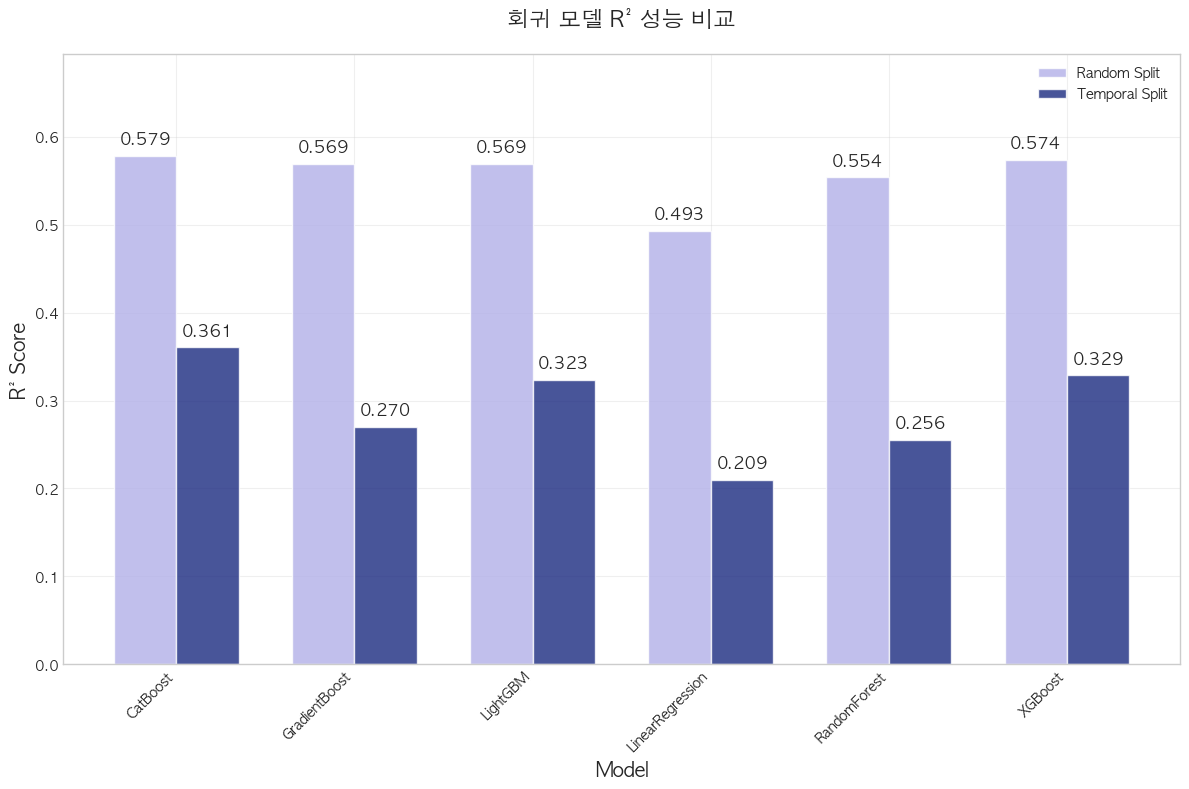


3. 분류 모델 Weighted F1 성능 그래프


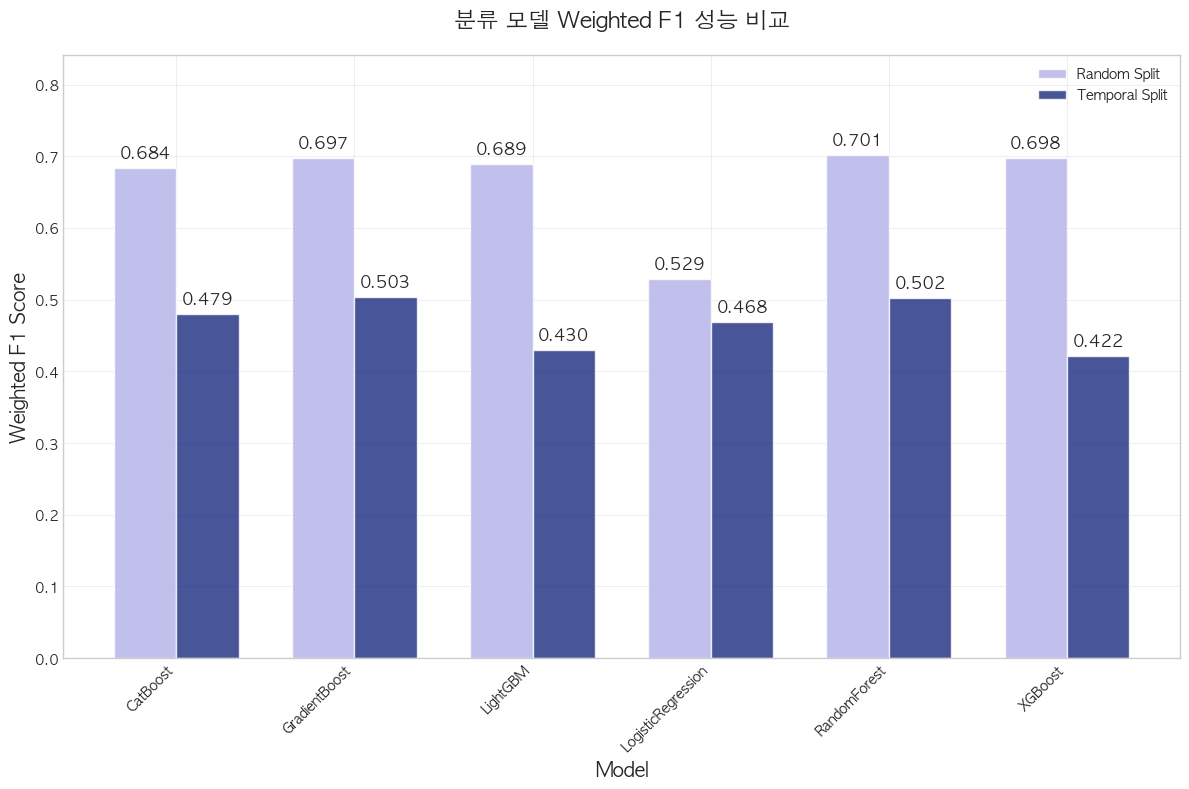


6. 센터별 최고 성능 그래프


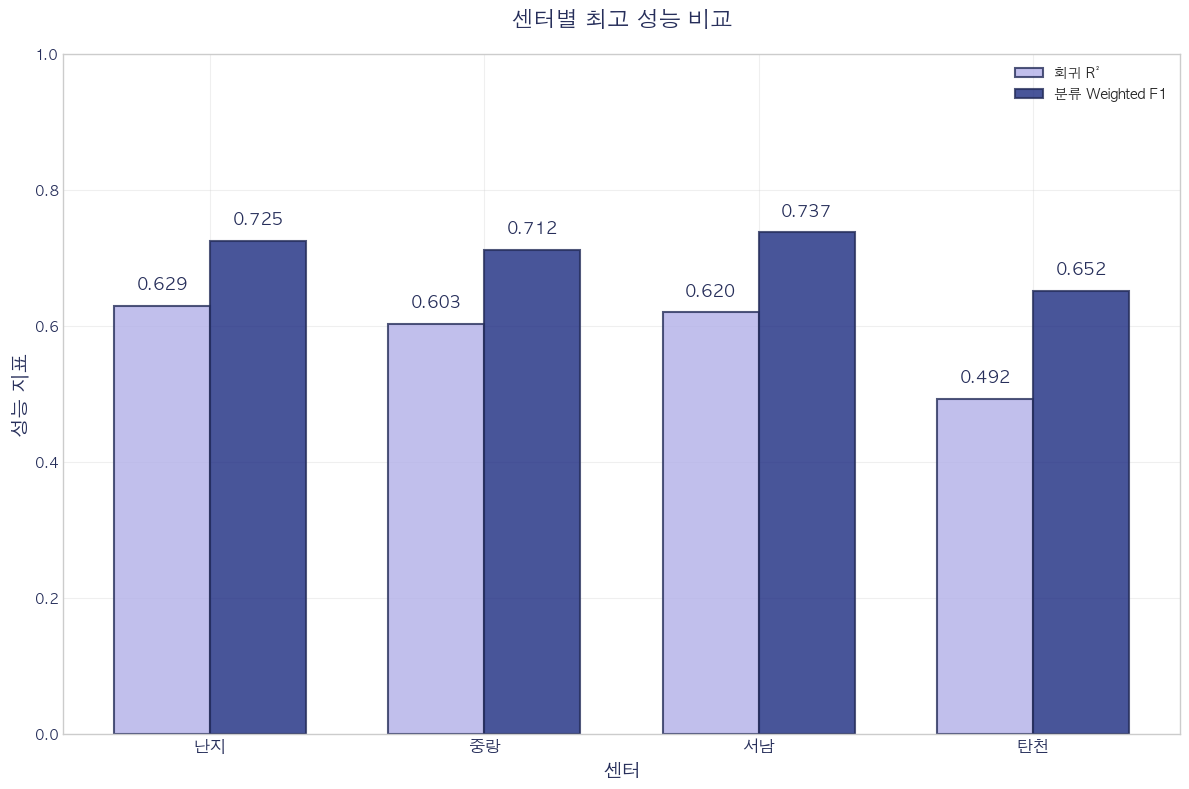

In [12]:
# 모델링 6개짜리 성능 상세 비교 (개별 그래프, 색상표 적용)
# ================================================================
# all_model_results.csv 파일을 활용한 고급 성능 비교 시각화
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager
import warnings

warnings.filterwarnings('ignore')

# ================================
# 색상표 정의
# ================================
# 등급분류용 그라데이션 색상
GRADE_COLORS = ["#1A2A80", "#3B38A0", "#7A85C1", "#B2B0E8"]

# 메인 색상
MAIN_COLOR = "#262E5A"

# 센터별 색상
CENTER_COLORS = {
    "nanji": "#005F73",     # 난지: 청록
    "jungnang": "#FFB703",  # 중랑: 주황
    "seonam": "#BB3E03",    # 서남: 빨강
    "tancheon": "#606C38",  # 탄천: 올리브 그린
}

# 모델링 전용 색상 정의
SPLIT_COLORS = {
    'random': GRADE_COLORS[3],    # #7A85C1 (연파랑)
    'temporal': GRADE_COLORS[0],  # #1A2A80 (진파랑)
}

# 전체 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# Windows의 경우: plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def load_and_prepare_data(csv_path='../results_step1/all_model_results.csv'):
    """CSV 데이터 로드 및 전처리"""
    try:
        df = pd.read_csv(csv_path, encoding='utf-8-sig')
        print(f"데이터 로드 완료: {len(df)}개 결과")
        return df
    except FileNotFoundError:
        print(f"파일을 찾을 수 없습니다: {csv_path}")
        print("Step 1을 먼저 실행하여 결과 파일을 생성해주세요.")
        return None

def plot_regression_r2(df):
    """1. 회귀 모델 R² 성능"""
    reg_data = df[df['task'] == 'regression'].copy()
    
    if len(reg_data) == 0:
        print("회귀 데이터가 없습니다.")
        return
        
    plt.figure(figsize=(12, 8))
    
    reg_pivot = reg_data.groupby(['model', 'split_method'])['R2'].mean().unstack(fill_value=0)
    
    x = np.arange(len(reg_pivot.index))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, reg_pivot.get('random', 0), width, 
                   label='Random Split', color=SPLIT_COLORS['random'], alpha=0.8, 
                )
    bars2 = plt.bar(x + width/2, reg_pivot.get('temporal', 0), width,
                   label='Temporal Split', color=SPLIT_COLORS['temporal'], alpha=0.8,
                )
    
    # 값 표시
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom', 
                       fontsize=12, fontweight='bold')
    
    plt.xlabel('Model', fontsize=14, fontweight='bold')
    plt.ylabel('R² Score', fontsize=14, fontweight='bold')
    plt.title('회귀 모델 R² 성능 비교', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(x, [m.replace('_', ' ') for m in reg_pivot.index], rotation=45, ha='right')
    plt.legend(loc='upper right', framealpha=0.9)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, max(reg_pivot.max()) * 1.2)
    plt.tight_layout()
    plt.show()

def plot_classification_weighted_f1(df):
    """3. 분류 모델 Weighted F1 성능"""
    clf_data = df[df['task'] == 'classification'].copy()
    
    if len(clf_data) == 0:
        print("분류 데이터가 없습니다.")
        return
        
    plt.figure(figsize=(12, 8))
    
    clf_extreme_pivot = clf_data.groupby(['model', 'split_method'])['F1_weighted'].mean().unstack(fill_value=0)
    
    x = np.arange(len(clf_extreme_pivot.index))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, clf_extreme_pivot.get('random', 0), width,
                   label='Random Split', color=SPLIT_COLORS['random'], alpha=0.8,
                )
    bars2 = plt.bar(x + width/2, clf_extreme_pivot.get('temporal', 0), width,
                   label='Temporal Split', color=SPLIT_COLORS['temporal'], alpha=0.8,
                )
    
    # 값 표시
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom', 
                       fontsize=12, fontweight='bold')
    
    plt.xlabel('Model', fontsize=14, fontweight='bold')
    plt.ylabel('Weighted F1 Score', fontsize=14, fontweight='bold')
    plt.title('분류 모델 Weighted F1 성능 비교', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(x, [m.replace('_', ' ') for m in clf_extreme_pivot.index], rotation=45, ha='right')
    plt.legend(loc='upper right', framealpha=0.9)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, max(clf_extreme_pivot.max()) * 1.2)
    plt.tight_layout()
    plt.show()


def plot_center_best_performance(df):
    """6. 센터별 최고 성능 (한국어 센터명)"""
    
    # 센터명 영어->한국어 매핑
    CENTER_NAME_MAP = {
        'nanji': '난지',
        'jungnang': '중랑', 
        'seonam': '서남',
        'tancheon': '탄천'
    }
    
    reg_data = df[df['task'] == 'regression'].copy()
    clf_data = df[df['task'] == 'classification'].copy()
    
    plt.figure(figsize=(12, 8))
    
    center_performance = []
    centers = df['center'].unique()
    
    for center in centers:
        # 각 센터의 회귀 최고 R²
        center_reg = reg_data[reg_data['center'] == center]
        best_r2 = center_reg['R2'].max() if len(center_reg) > 0 else 0
        
        # 각 센터의 분류 최고 F1_weighted
        center_clf = clf_data[clf_data['center'] == center]
        best_f1 = center_clf['F1_weighted'].max() if len(center_clf) > 0 else 0
        
        # 한국어 센터명으로 변경
        korean_name = CENTER_NAME_MAP.get(center, center)
        center_performance.append({'center': korean_name, 'best_r2': best_r2, 'best_f1': best_f1})
    
    if center_performance:
        center_df = pd.DataFrame(center_performance)
        x = np.arange(len(center_df))
        width = 0.35
        
        # 색상 설정
        r2_colors = "#B2B0E8"
        f1_colors = "#1A2A80"
        
        bars1 = plt.bar(x - width/2, center_df['best_r2'], width,
                       label='회귀 R²', color=r2_colors, alpha=0.8,
                       edgecolor="#262E5A", linewidth=1.5)
        bars2 = plt.bar(x + width/2, center_df['best_f1'], width,
                       label='분류 Weighted F1', color=f1_colors, alpha=0.8,
                       edgecolor="#262E5A", linewidth=1.5)
        
        # 값 표시
        for i, (r2, f1) in enumerate(zip(center_df['best_r2'], center_df['best_f1'])):
            plt.text(i - width/2, r2 + 0.02, f'{r2:.3f}', ha='center', va='bottom', 
                    fontsize=12, fontweight='bold', color="#262E5A")
            plt.text(i + width/2, f1 + 0.02, f'{f1:.3f}', ha='center', va='bottom',
                    fontsize=12, fontweight='bold', color="#262E5A")
        
        plt.xlabel('센터', fontsize=14, fontweight='bold', color="#262E5A")
        plt.ylabel('성능 지표', fontsize=14, fontweight='bold', color="#262E5A")
        plt.title('센터별 최고 성능 비교', fontsize=16, fontweight='bold', color="#262E5A", pad=20)
        plt.xticks(x, center_df['center'], fontsize=12, color="#262E5A")
        plt.yticks(color="#262E5A")
        plt.legend(loc='upper right', framealpha=0.9)
        plt.grid(True, alpha=0.3)
        plt.ylim(0, 1.0)
        plt.tight_layout()
        plt.show()

# 함수 실행 (df는 이미 정의된 데이터프레임)
# plot_center_best_performance(df)
def run_all_visualizations(df):
    """모든 시각화 실행"""
    if df is None:
        return
        
    print("\n1. 회귀 모델 R² 성능 그래프")
    plot_regression_r2(df)
    
    print("\n3. 분류 모델 Weighted F1 성능 그래프")
    plot_classification_weighted_f1(df)
    
    print("\n6. 센터별 최고 성능 그래프")
    plot_center_best_performance(df)

# ================================================================
# 메인 실행 코드
# ================================================================
# 데이터 로드
df = load_and_prepare_data()

# 결과 디렉토리 생성
import os
os.makedirs('../results_step1', exist_ok=True)

print("=== 모델 성능 비교 시각화 (개별 그래프) ===")
run_all_visualizations(df)

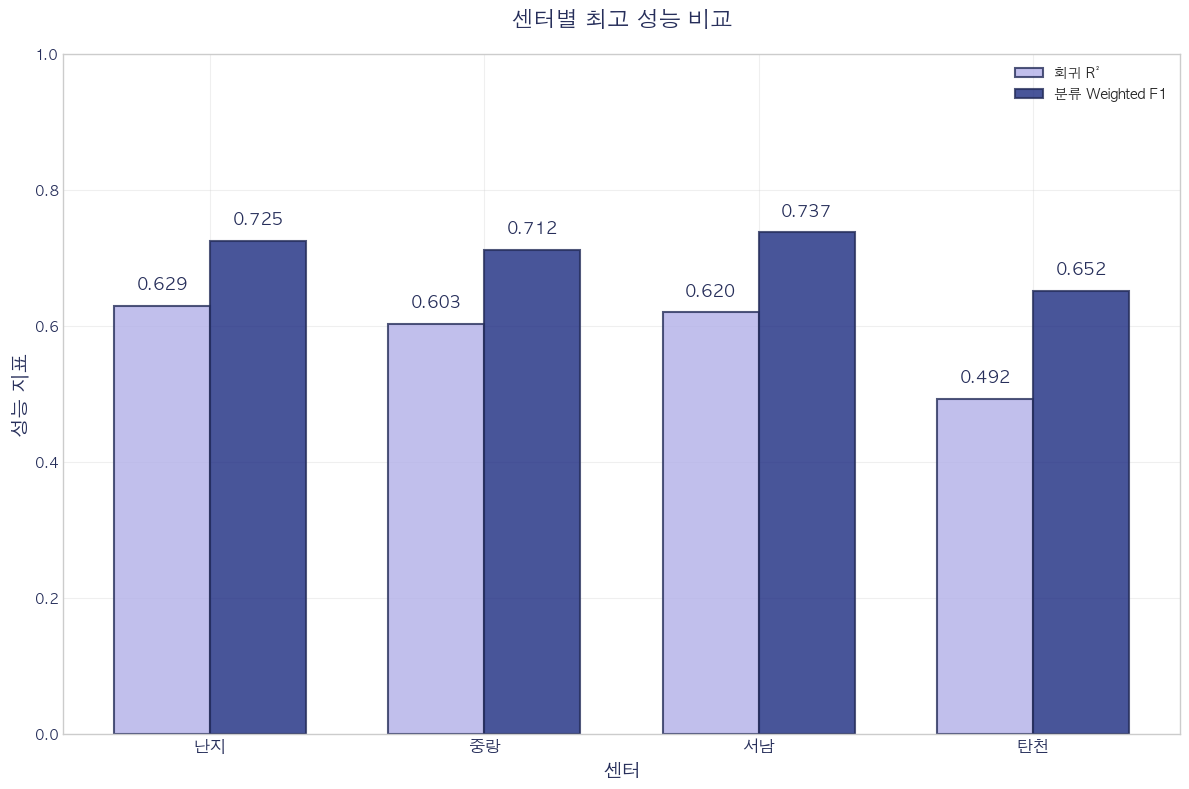

In [13]:
def plot_center_best_performance(df):
    """6. 센터별 최고 성능 (한국어 센터명)"""
    
    # 센터명 영어->한국어 매핑
    CENTER_NAME_MAP = {
        'nanji': '난지',
        'jungnang': '중랑', 
        'seonam': '서남',
        'tancheon': '탄천'
    }
    
    reg_data = df[df['task'] == 'regression'].copy()
    clf_data = df[df['task'] == 'classification'].copy()
    
    plt.figure(figsize=(12, 8))
    
    center_performance = []
    centers = df['center'].unique()
    
    for center in centers:
        # 각 센터의 회귀 최고 R²
        center_reg = reg_data[reg_data['center'] == center]
        best_r2 = center_reg['R2'].max() if len(center_reg) > 0 else 0
        
        # 각 센터의 분류 최고 F1_weighted
        center_clf = clf_data[clf_data['center'] == center]
        best_f1 = center_clf['F1_weighted'].max() if len(center_clf) > 0 else 0
        
        # 한국어 센터명으로 변경
        korean_name = CENTER_NAME_MAP.get(center, center)
        center_performance.append({'center': korean_name, 'best_r2': best_r2, 'best_f1': best_f1})
    
    if center_performance:
        center_df = pd.DataFrame(center_performance)
        x = np.arange(len(center_df))
        width = 0.35
        
        # 색상 설정
        r2_colors = "#B2B0E8"
        f1_colors = "#1A2A80"
        
        bars1 = plt.bar(x - width/2, center_df['best_r2'], width,
                       label='회귀 R²', color=r2_colors, alpha=0.8,
                       edgecolor="#262E5A", linewidth=1.5)
        bars2 = plt.bar(x + width/2, center_df['best_f1'], width,
                       label='분류 Weighted F1', color=f1_colors, alpha=0.8,
                       edgecolor="#262E5A", linewidth=1.5)
        
        # 값 표시
        for i, (r2, f1) in enumerate(zip(center_df['best_r2'], center_df['best_f1'])):
            plt.text(i - width/2, r2 + 0.02, f'{r2:.3f}', ha='center', va='bottom', 
                    fontsize=12, fontweight='bold', color="#262E5A")
            plt.text(i + width/2, f1 + 0.02, f'{f1:.3f}', ha='center', va='bottom',
                    fontsize=12, fontweight='bold', color="#262E5A")
        
        plt.xlabel('센터', fontsize=14, fontweight='bold', color="#262E5A")
        plt.ylabel('성능 지표', fontsize=14, fontweight='bold', color="#262E5A")
        plt.title('센터별 최고 성능 비교', fontsize=16, fontweight='bold', color="#262E5A", pad=20)
        plt.xticks(x, center_df['center'], fontsize=12, color="#262E5A")
        plt.yticks(color="#262E5A")
        plt.legend(loc='upper right', framealpha=0.9)
        plt.grid(True, alpha=0.3)
        plt.ylim(0, 1.0)
        plt.tight_layout()
        plt.show()

# 함수 실행 (df는 이미 정의된 데이터프레임)
plot_center_best_performance(df)

Step 2: 베스트 모델 시각화 시작
시작 시간: 2025-09-09 16:15:13
Step 1 결과 로드 완료:
  - 전체 모델 결과: 96개
  - 베스트 모델: 8개

=== 센터별 성능 개별 그래프 시각화 ===

1. 센터별 최고 R² 성능 (회귀)


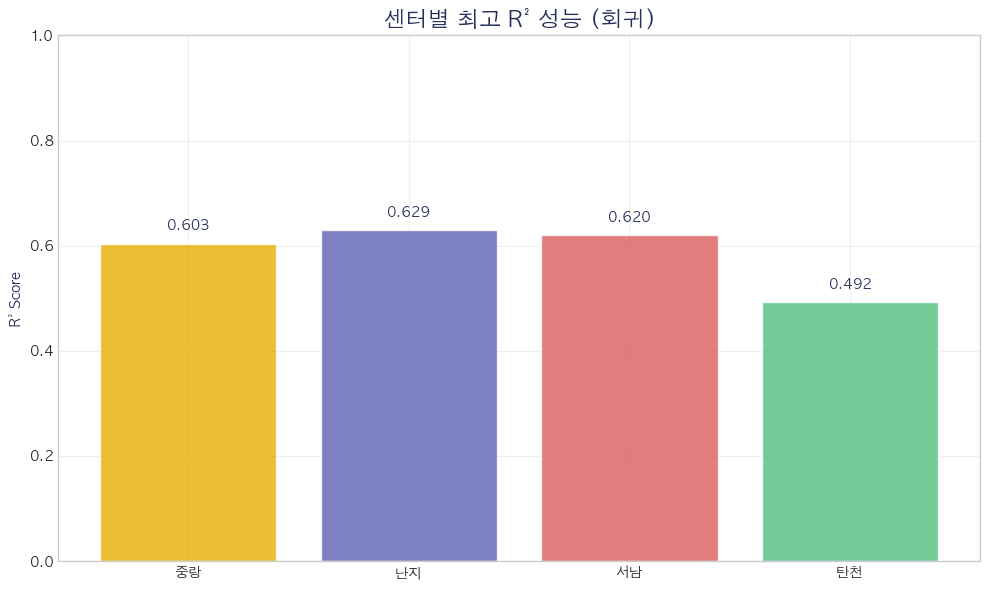


2. 센터별 최저 RMSE (회귀)


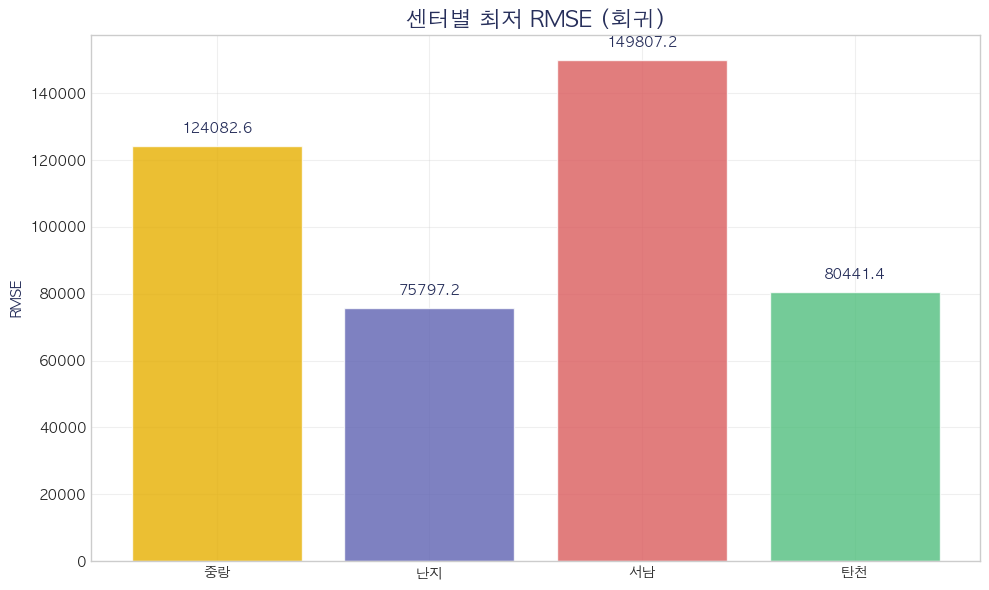


3. 센터별 최고 F1_weighted (분류)


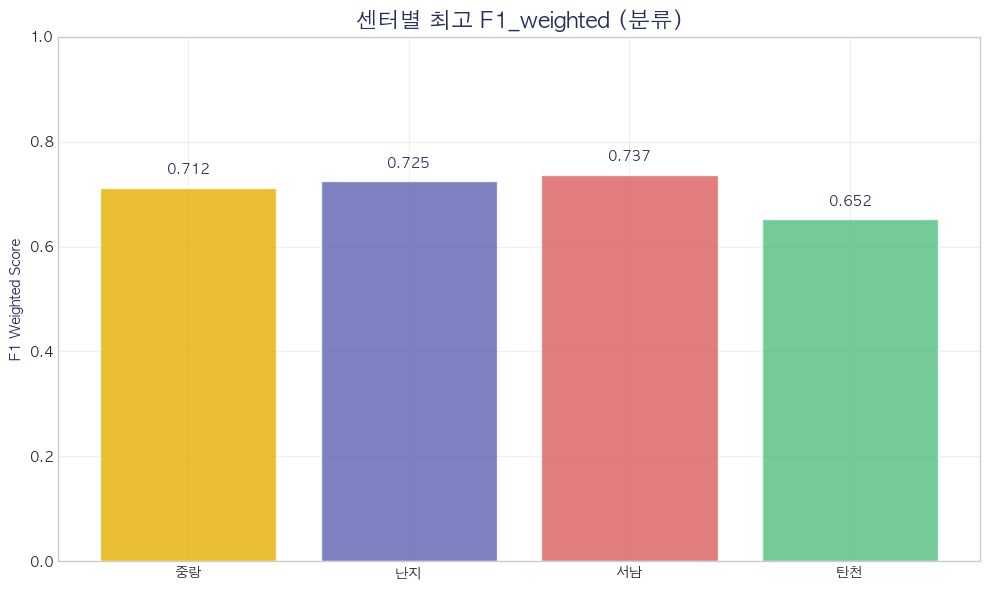


4. 센터별 최고 Accuracy (분류)


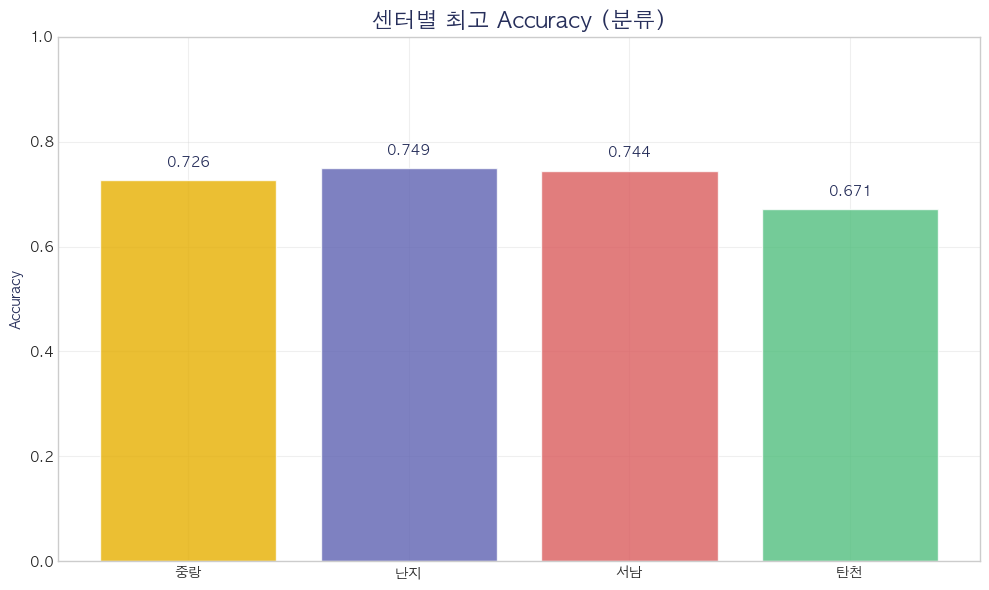


=== 모든 개별 그래프 완료 ===


In [20]:
# **2단계: 베스트 모델 시각화 (개별 그래프, 한국어 센터명)**
# ================================================================
# 하수처리량 예측 - Step 2: 베스트 모델 성능 시각화
# ================================================================

import os, warnings
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier,
    GradientBoostingRegressor, GradientBoostingClassifier
)
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score
)

import xgboost as xgb
import catboost as cb
import lightgbm as lgb

warnings.filterwarnings('ignore')

# ================================
# 색상표 정의
# ================================
# 등급분류용 그라데이션 색상
GRADE_COLORS = ["#1A2A80", "#3B38A0", "#7A85C1", "#B2B0E8"]

# 센터별 색상
CENTER_COLORS = {
    "nanji": "#5E62B2",     # 난지
    "jungnang": "#E6AF00",  # 중랑
    "seonam": "#DA5C5D",    # 서남
    "tancheon": "#51BF7E",  # 탄천
}
# 센터명 영어->한국어 매핑
CENTER_NAME_MAP = {
    'nanji': '난지',
    'jungnang': '중랑', 
    'seonam': '서남',
    'tancheon': '탄천'
}

# 메인 색상
MAIN_COLOR = "#262E5A"

# 설정
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)

print("Step 2: 베스트 모델 시각화 시작")
print(f"시작 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# ================================================================
# 1. Step 1 결과 로드
# ================================================================

try:
    # Step 1 결과 파일들 로드
    all_results_df = pd.read_csv('../results_step1/all_model_results.csv')
    best_models_df = pd.read_csv('../results_step1/best_models.csv')
    
    print(f"Step 1 결과 로드 완료:")
    print(f"  - 전체 모델 결과: {len(all_results_df)}개")
    print(f"  - 베스트 모델: {len(best_models_df)}개")
    
except Exception as e:
    print(f"Step 1 결과 파일 로드 실패: {e}")
    print("Step 1을 먼저 실행해주세요.")
    exit()

# ================================================================
# 2. 개별 성능 시각화 함수들
# ================================================================

def plot_r2_performance(all_results_df):
    """1. 센터별 최고 R² 성능 (회귀)"""
    print("\n1. 센터별 최고 R² 성능 (회귀)")
    
    reg_data = all_results_df[all_results_df['task'] == 'regression']
    if len(reg_data) == 0:
        print("회귀 데이터가 없습니다.")
        return
        
    best_r2 = reg_data.loc[reg_data.groupby('center')['R2'].idxmax()]
    
    # 한국어 센터명으로 변경
    korean_centers = [CENTER_NAME_MAP.get(center, center) for center in best_r2['center']]
    center_colors = [CENTER_COLORS.get(center, MAIN_COLOR) for center in best_r2['center']]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(korean_centers, best_r2['R2'], color=center_colors, 
                   alpha=0.8)
    
    # 값 표시
    for bar, val in zip(bars, best_r2['R2']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{val:.3f}', ha='center', va='bottom', 
                 fontweight='bold', color=MAIN_COLOR)
    
    plt.title('센터별 최고 R² 성능 (회귀)', fontsize=16, fontweight='bold', color=MAIN_COLOR)
    plt.ylabel('R² Score', fontweight='bold', color=MAIN_COLOR)
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_rmse_performance(all_results_df):
    """2. 센터별 최저 RMSE (회귀)"""
    print("\n2. 센터별 최저 RMSE (회귀)")
    
    reg_data = all_results_df[all_results_df['task'] == 'regression']
    if len(reg_data) == 0:
        print("회귀 데이터가 없습니다.")
        return
        
    best_rmse = reg_data.loc[reg_data.groupby('center')['RMSE'].idxmin()]
    
    # 한국어 센터명으로 변경
    korean_centers = [CENTER_NAME_MAP.get(center, center) for center in best_rmse['center']]
    center_colors = [CENTER_COLORS.get(center, MAIN_COLOR) for center in best_rmse['center']]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(korean_centers, best_rmse['RMSE'], color=center_colors, 
                   alpha=0.8)
    
    # 값 표시
    for bar, val in zip(bars, best_rmse['RMSE']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 
                 max(best_rmse['RMSE']) * 0.02, 
                 f'{val:.1f}', ha='center', va='bottom', 
                 fontweight='bold', color=MAIN_COLOR)
    
    plt.title('센터별 최저 RMSE (회귀)', fontsize=16, fontweight='bold', color=MAIN_COLOR)
    plt.ylabel('RMSE', fontweight='bold', color=MAIN_COLOR)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_f1_performance(all_results_df):
    """3. 센터별 최고 F1_weighted (분류)"""
    print("\n3. 센터별 최고 F1_weighted (분류)")
    
    clf_data = all_results_df[all_results_df['task'] == 'classification']
    if len(clf_data) == 0:
        print("분류 데이터가 없습니다.")
        return
        
    best_f1 = clf_data.loc[clf_data.groupby('center')['F1_weighted'].idxmax()]
    
    # 한국어 센터명으로 변경
    korean_centers = [CENTER_NAME_MAP.get(center, center) for center in best_f1['center']]
    center_colors = [CENTER_COLORS.get(center, MAIN_COLOR) for center in best_f1['center']]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(korean_centers, best_f1['F1_weighted'], color=center_colors, 
                   alpha=0.8)
    
    # 값 표시
    for bar, val in zip(bars, best_f1['F1_weighted']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{val:.3f}', ha='center', va='bottom', 
                 fontweight='bold', color=MAIN_COLOR)
    
    plt.title('센터별 최고 F1_weighted (분류)', fontsize=16, fontweight='bold', color=MAIN_COLOR)
    plt.ylabel('F1 Weighted Score', fontweight='bold', color=MAIN_COLOR)
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_accuracy_performance(all_results_df):
    """4. 센터별 최고 Accuracy (분류)"""
    print("\n4. 센터별 최고 Accuracy (분류)")
    
    clf_data = all_results_df[all_results_df['task'] == 'classification']
    if len(clf_data) == 0:
        print("분류 데이터가 없습니다.")
        return
        
    best_acc = clf_data.loc[clf_data.groupby('center')['Accuracy'].idxmax()]
    
    # 한국어 센터명으로 변경
    korean_centers = [CENTER_NAME_MAP.get(center, center) for center in best_acc['center']]
    center_colors = [CENTER_COLORS.get(center, MAIN_COLOR) for center in best_acc['center']]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(korean_centers, best_acc['Accuracy'], color=center_colors, 
                   alpha=0.8)
    
    # 값 표시
    for bar, val in zip(bars, best_acc['Accuracy']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{val:.3f}', ha='center', va='bottom', 
                 fontweight='bold', color=MAIN_COLOR)
    
    plt.title('센터별 최고 Accuracy (분류)', fontsize=16, fontweight='bold', color=MAIN_COLOR)
    plt.ylabel('Accuracy', fontweight='bold', color=MAIN_COLOR)
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def run_all_individual_plots():
    """모든 개별 그래프 실행"""
    print("\n=== 센터별 성능 개별 그래프 시각화 ===")
    
    plot_r2_performance(all_results_df)
    plot_rmse_performance(all_results_df)
    plot_f1_performance(all_results_df)
    plot_accuracy_performance(all_results_df)
    
    print("\n=== 모든 개별 그래프 완료 ===")

# ================================================================
# 시각화 실행
# ================================================================
run_all_individual_plots()